## Homework 2
### Olivia Cooper
### Computational Astrophysics, Spring 2022

In [1]:
# the basics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import astropy
from astropy.table import Table
import sod_shock_tube
plt.style.use('cooper-paper.mplstyle')

### Problem 1: Not so fast!

Use a perturbation analysis to show that the leapfrog scheme (time-centered
difference):

$\rho_j^{n+1} - \rho_j^{n-1} = -v_0 \frac{\Delta t}{\Delta x} (\rho_{j+1}^{n} - \rho_{j-1}^{n})$

is conditionally stable, i.e. it is stable as long as $\Delta t \leq \frac{\Delta x}{v_0}$. Assume that $v_0$ is a constant
velocity.

First, introduce the perturbation:

$\rho_j^n(k) = \xi_j^n e^{ikj\Delta x}$

Now, apply this to our leapfrog scheme and simplify.

$\xi_j^{n+1} e^{ikj\Delta x} - \xi_j^{n-1} e^{ikj\Delta x} =  \frac{-v_0\Delta t}{\Delta x} (\xi_{j+1}^{n} e^{ik(j+1)\Delta x} - \xi_{j-1}^{n} e^{ik(j-1)\Delta x})$

$\xi_j^{n+1}  - \xi_j^{n-1}  =  \frac{-v_0\Delta t}{\Delta x} (\xi_{j+1}^{n} e^{ik\Delta x} - \xi_{j-1}^{n} e^{-ik\Delta x})$

$\xi  - \xi^{-1}  =  \frac{-v_0\Delta t}{\Delta x} (e^{ik\Delta x} -  e^{-ik\Delta x})$

We know that $\xi$ is small, so the $1/\xi$ goes to zero. Now we can substitute in a sine function for the exponential terms.

$\xi  =  \frac{-v_0\Delta t}{\Delta x} (e^{ik\Delta x} -  e^{-ik\Delta x})$

$\xi  =  \frac{-v_0\Delta t}{\Delta x} (i sin(k\Delta x))$

We showed in class that in the case $||\xi||>1$, the perturbation grows with time and is unconditionally unstable. So, solve for $||\xi||\leq1$ to find when the scheme is conditionally stable.

$||\xi||  =  \left[\frac{v_0^2\Delta t^2}{\Delta x^2} (sin^2(k\Delta x))\right]^{1/2}$

The $sin^2(k\Delta x)$ term will oscillate from 0 to 1, with a maximum value of 1. Taking this maximum case, we can write our condition and simplify:

$\left[\frac{v_0^2\Delta t^2}{\Delta x^2}\right]^{1/2} \leq 1$

$\Delta t \leq \frac{\Delta x}{v_0}$

### Problem 2: Sod Shock Tube

Using the finite volume discretization given in class and a programming language
of your choice, write your own 1D hydrodynamic solver.

a) The quintessential shock benchmark problem is the “Sod Shock Tube” (first formulated
by Sod in 1978). The problem involves setting up two discontinuous states at $t = 0$: a hot
dense gas on the left and a cool, low-density gas on the right. The result is a shock wave
that travels left to right into the cold gas, and a rarefaction wave that travels into the dense
gas on the left.

Let the domain be [0,2], and set ρ1 = 1.0, p1 = 1.0 for x ≤0.75 and ρ2 = 0.125,
p2 = 0.1 for x > 0.75. Assume γ = 1.4 and use this to determine the specific energy. Set
v = 0 everywhere initially. Use symmetry boundary conditions and N = 200 grid cells. Set
the time step according to a CFL number of 0.5.

Compute the solution at t = 0.245 and make plots of the density, velocity, pressure and
specific energy as a function of position. Compare the shock properties (speed, density
jump, pressure jump, velocity) with that predicted for these conditions (e.g. see Stone &
Norman 1992).

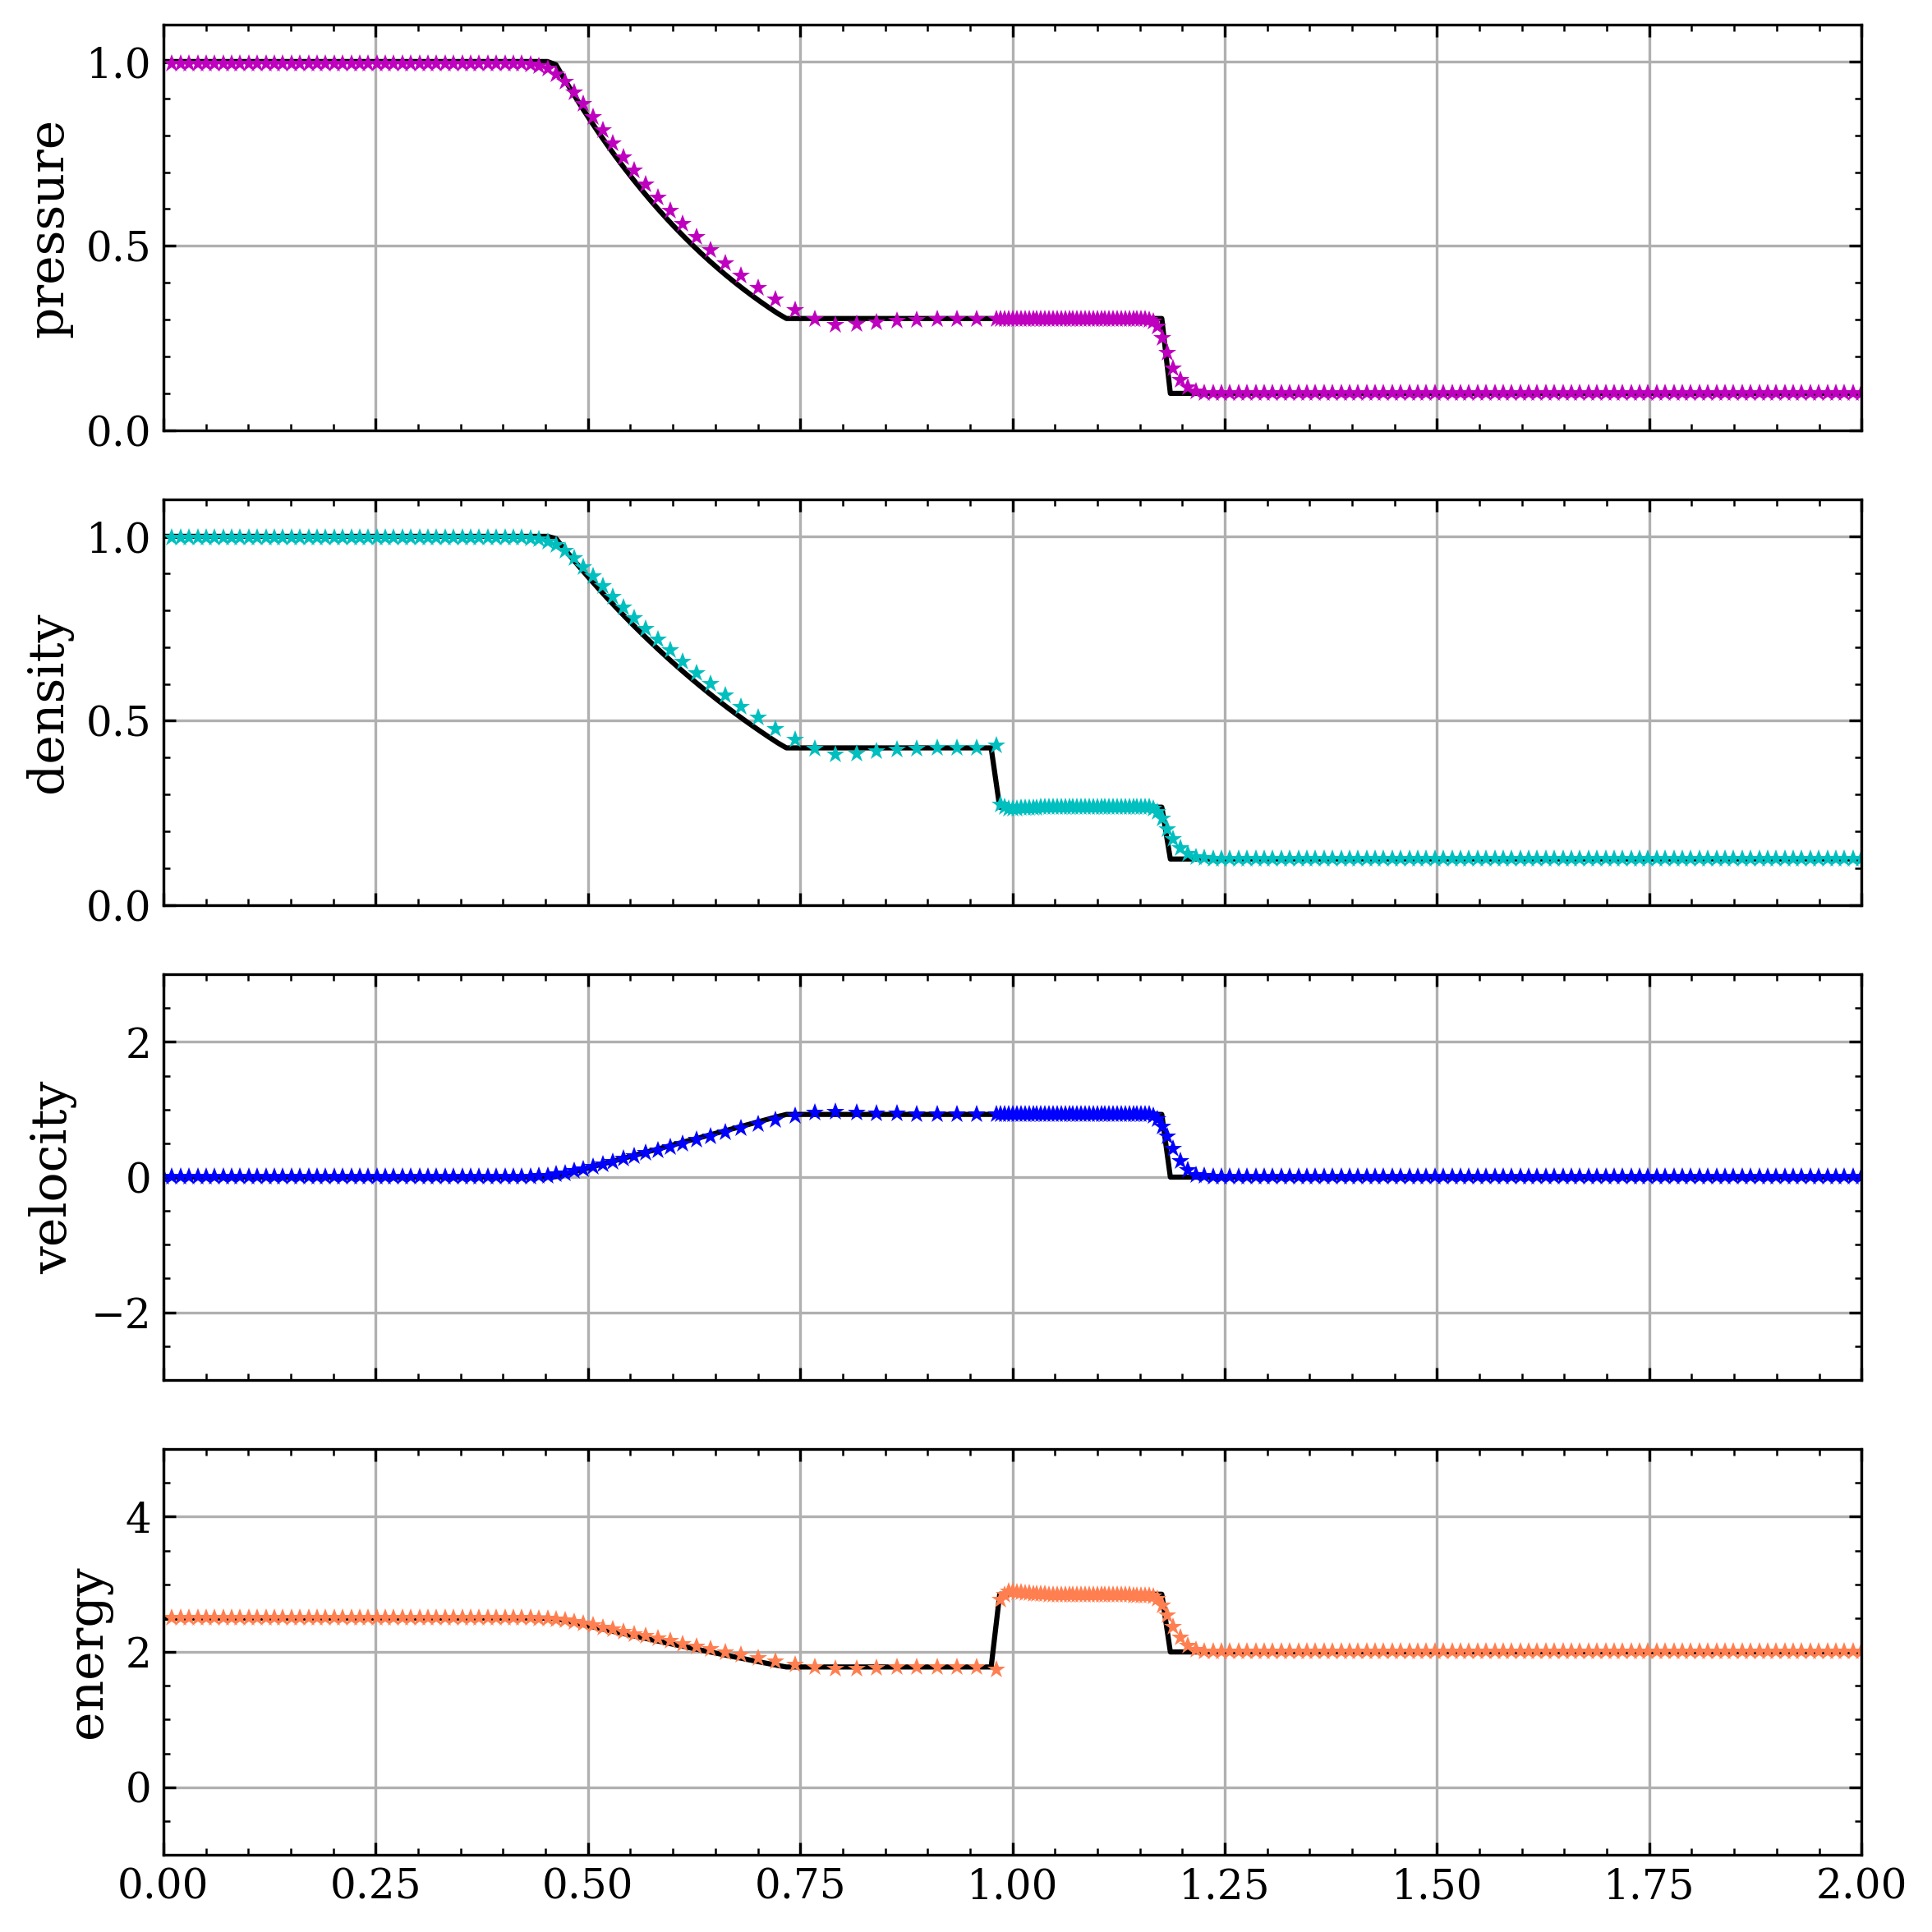

In [2]:
sod_shock_tube.numerical(N=200,tmax=0.245,verbose=False)

b) Simple numerical schemes are prone to certain artifacts near the shock interface. What
deviations from the analytic solution do you notice? What numerical improvements would
you apply to address them?

There are deviations at the shock interface where the discontinuity is not actually discontinuous and the shock becomes wider than the real solution. Two ideas for numerical improvements is to implement a higher order accurate scheme, and to decrease step size by increasing $N$ in order to model the shocks more accurately.

c) Check the shock solution for $N = 100$, $200$ and $400$ grid cells. How quickly is the solution
converging? Is this consistent with your expectations?

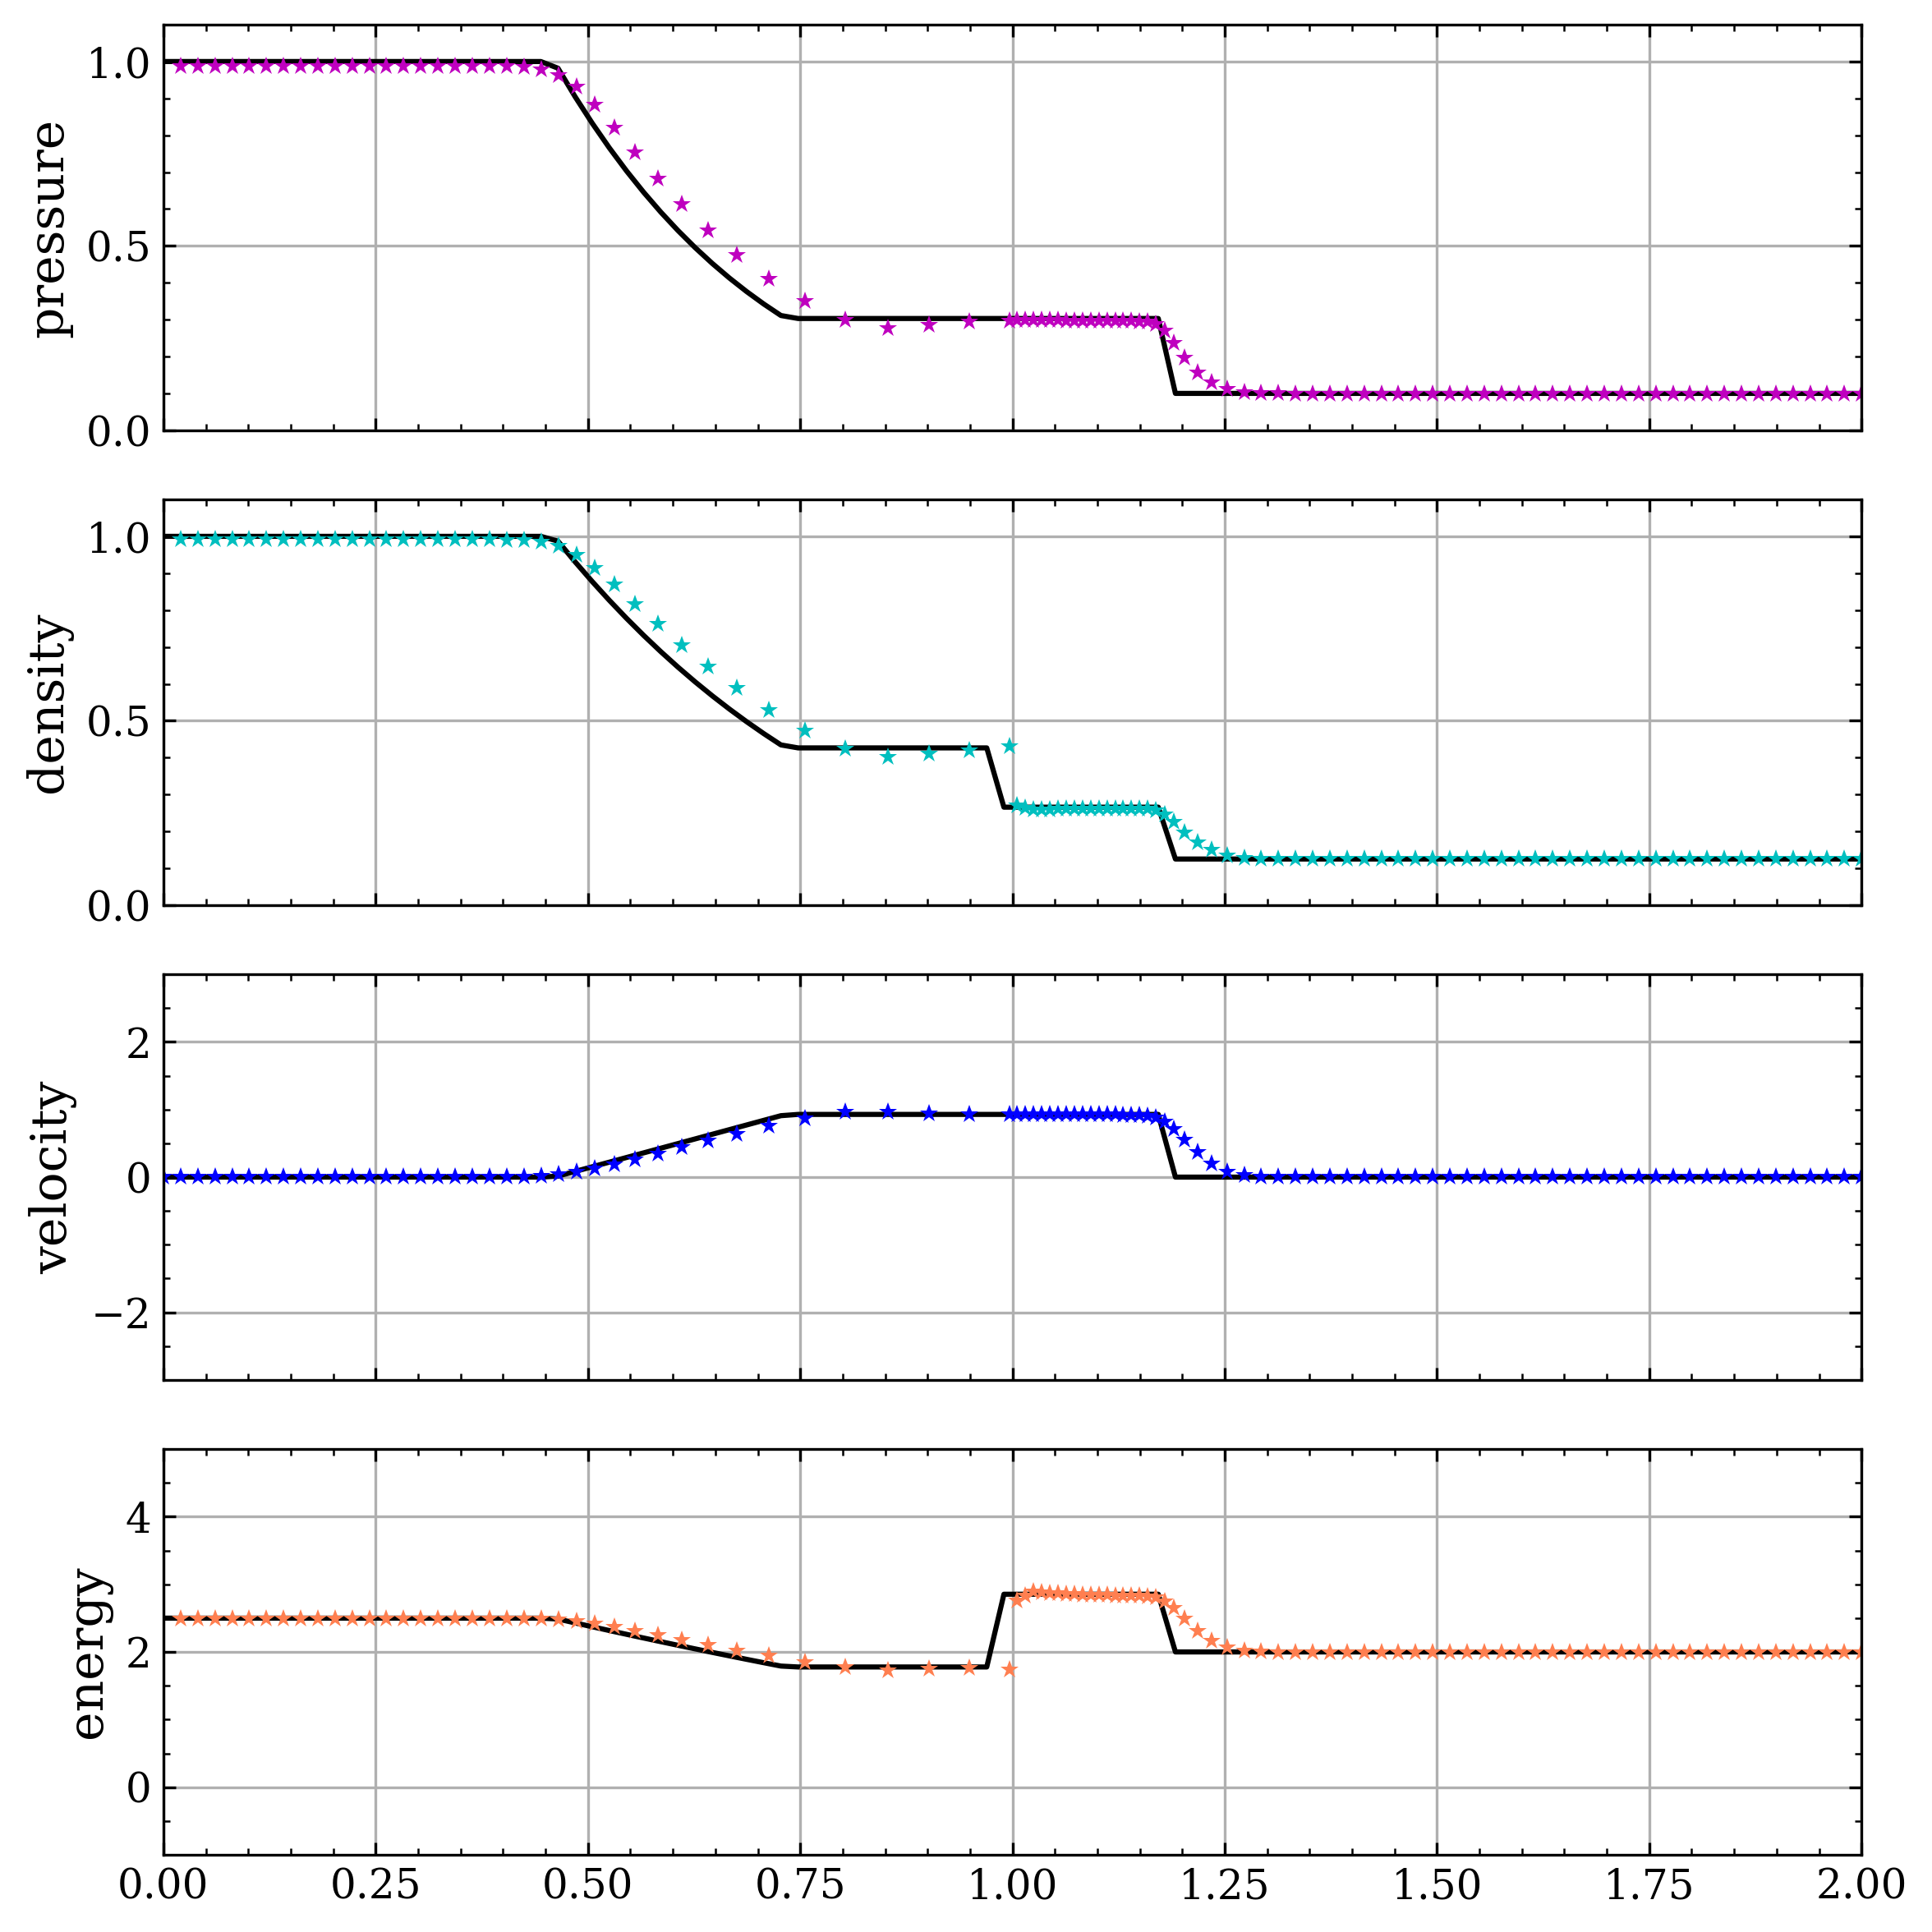

In [3]:
sod_shock_tube.numerical(N=100,verbose=False)

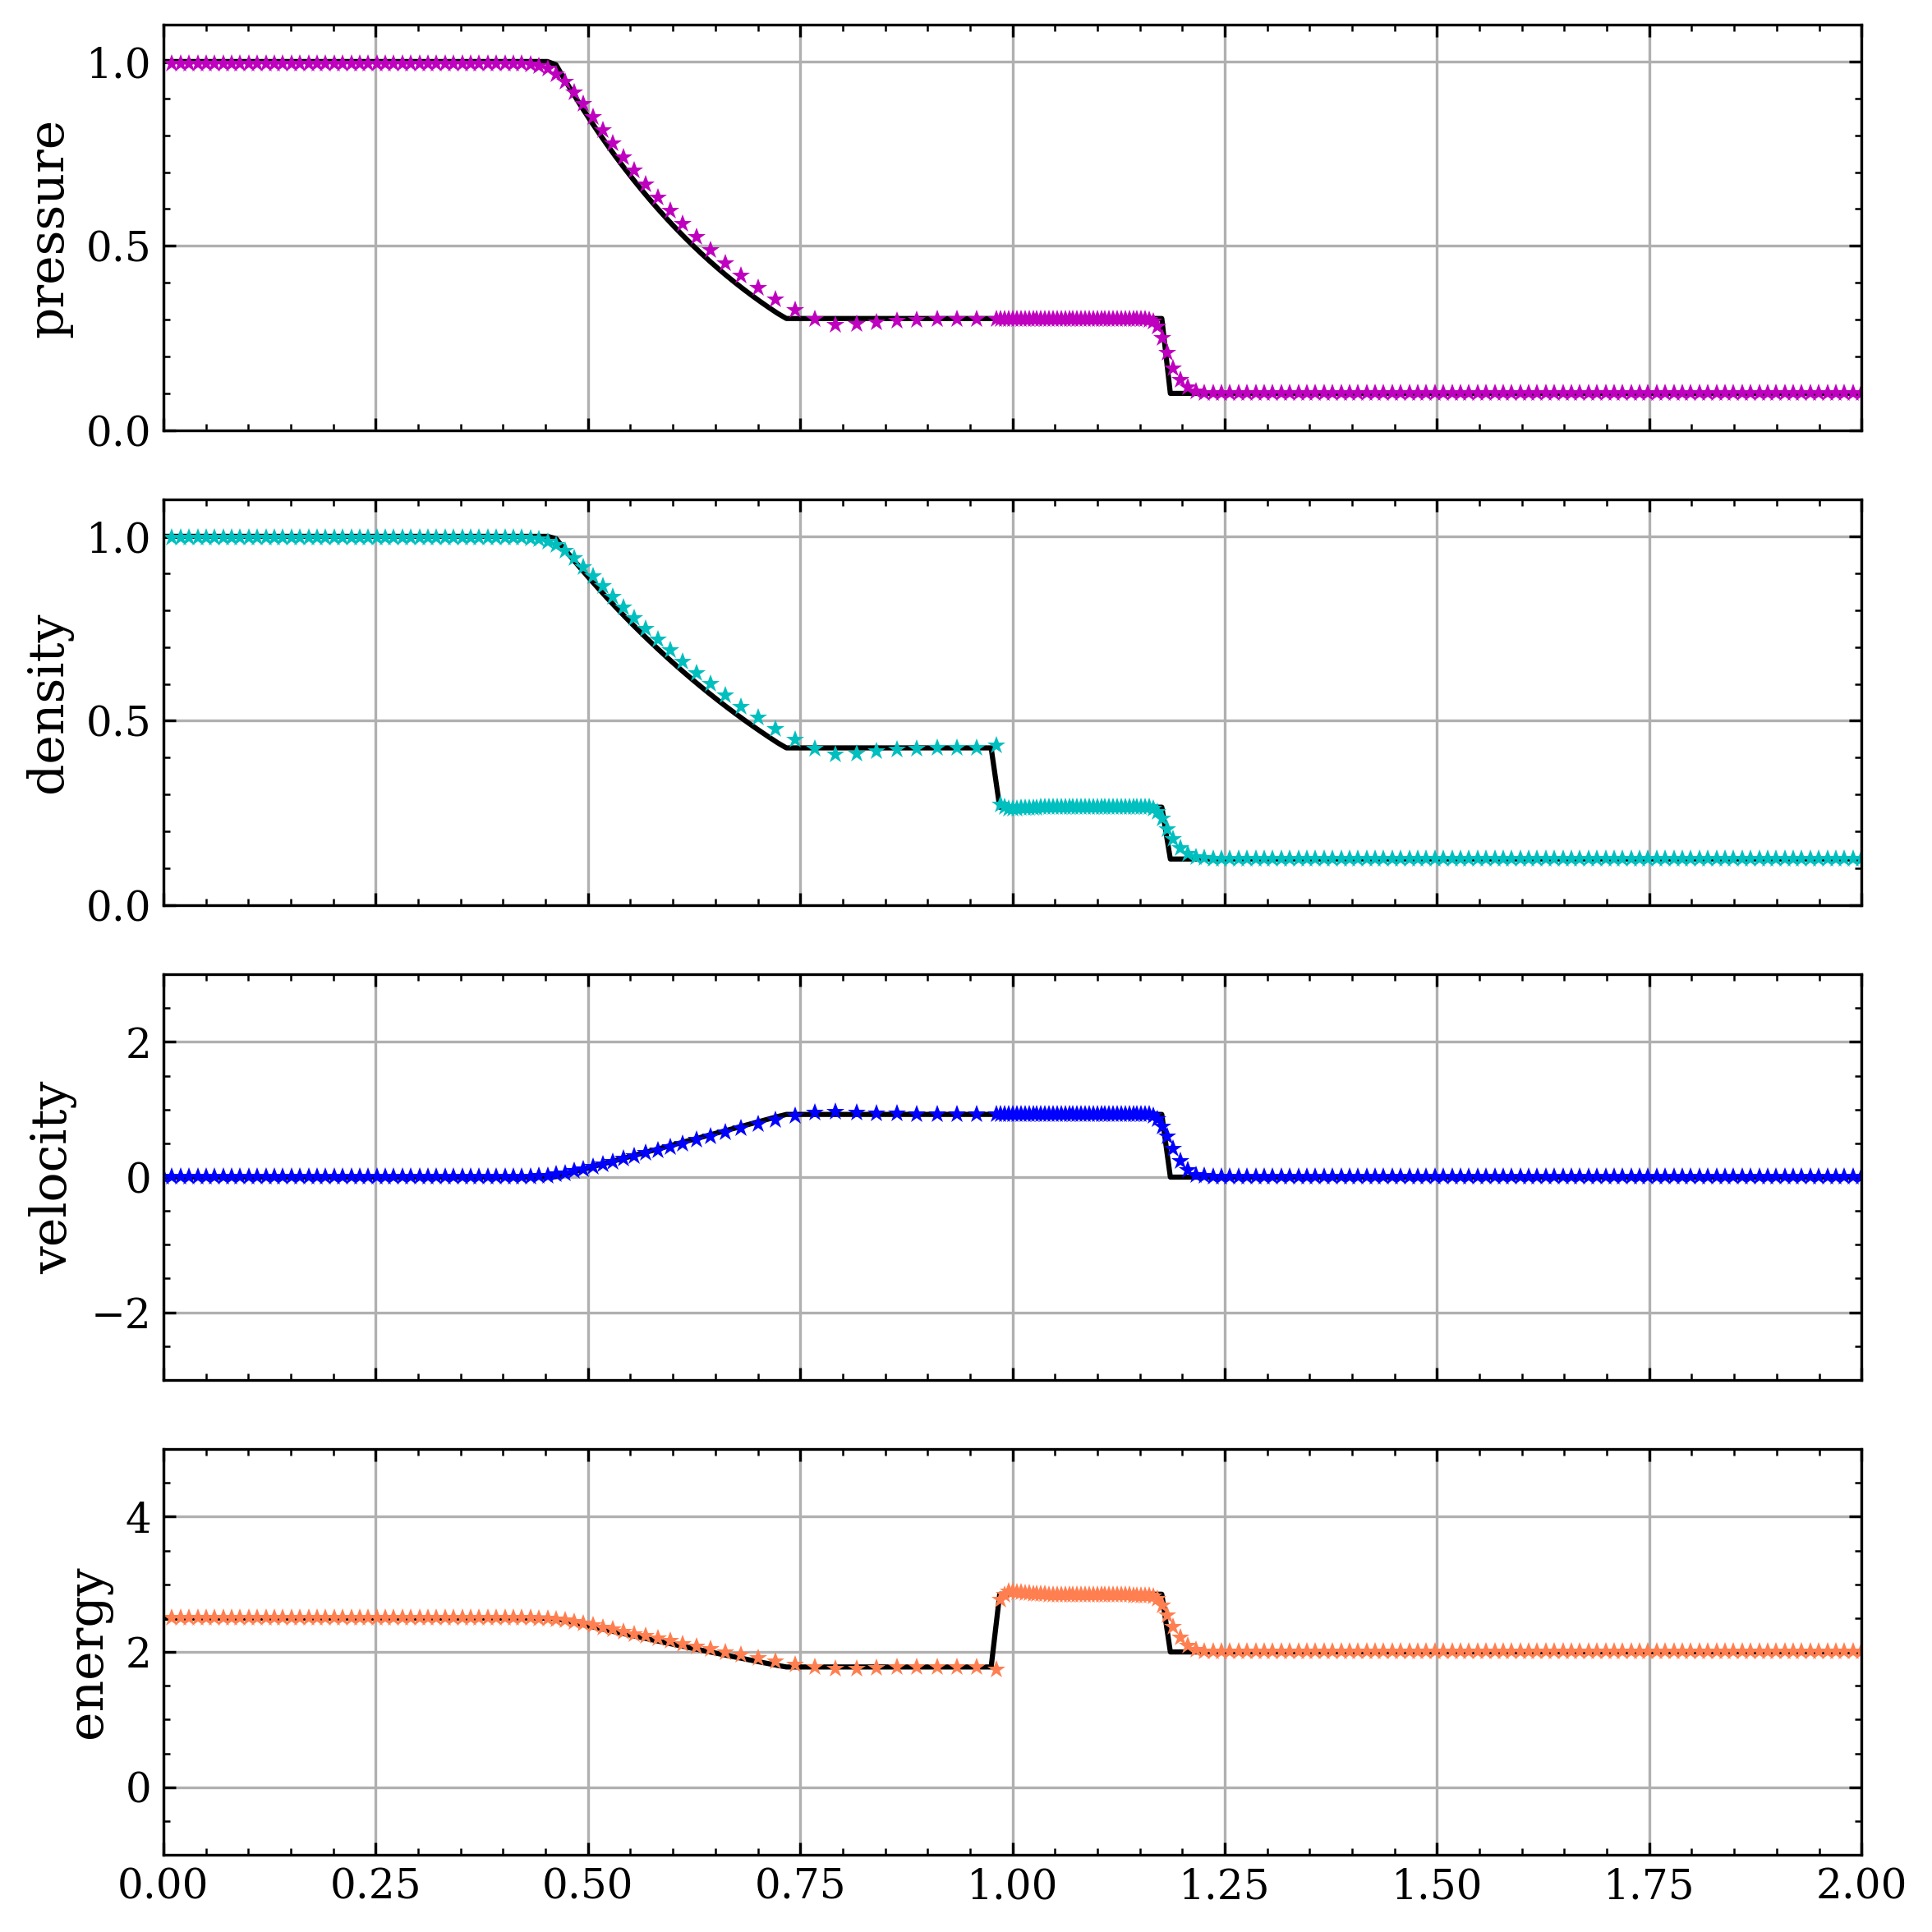

In [4]:
sod_shock_tube.numerical(N=200,verbose=False)

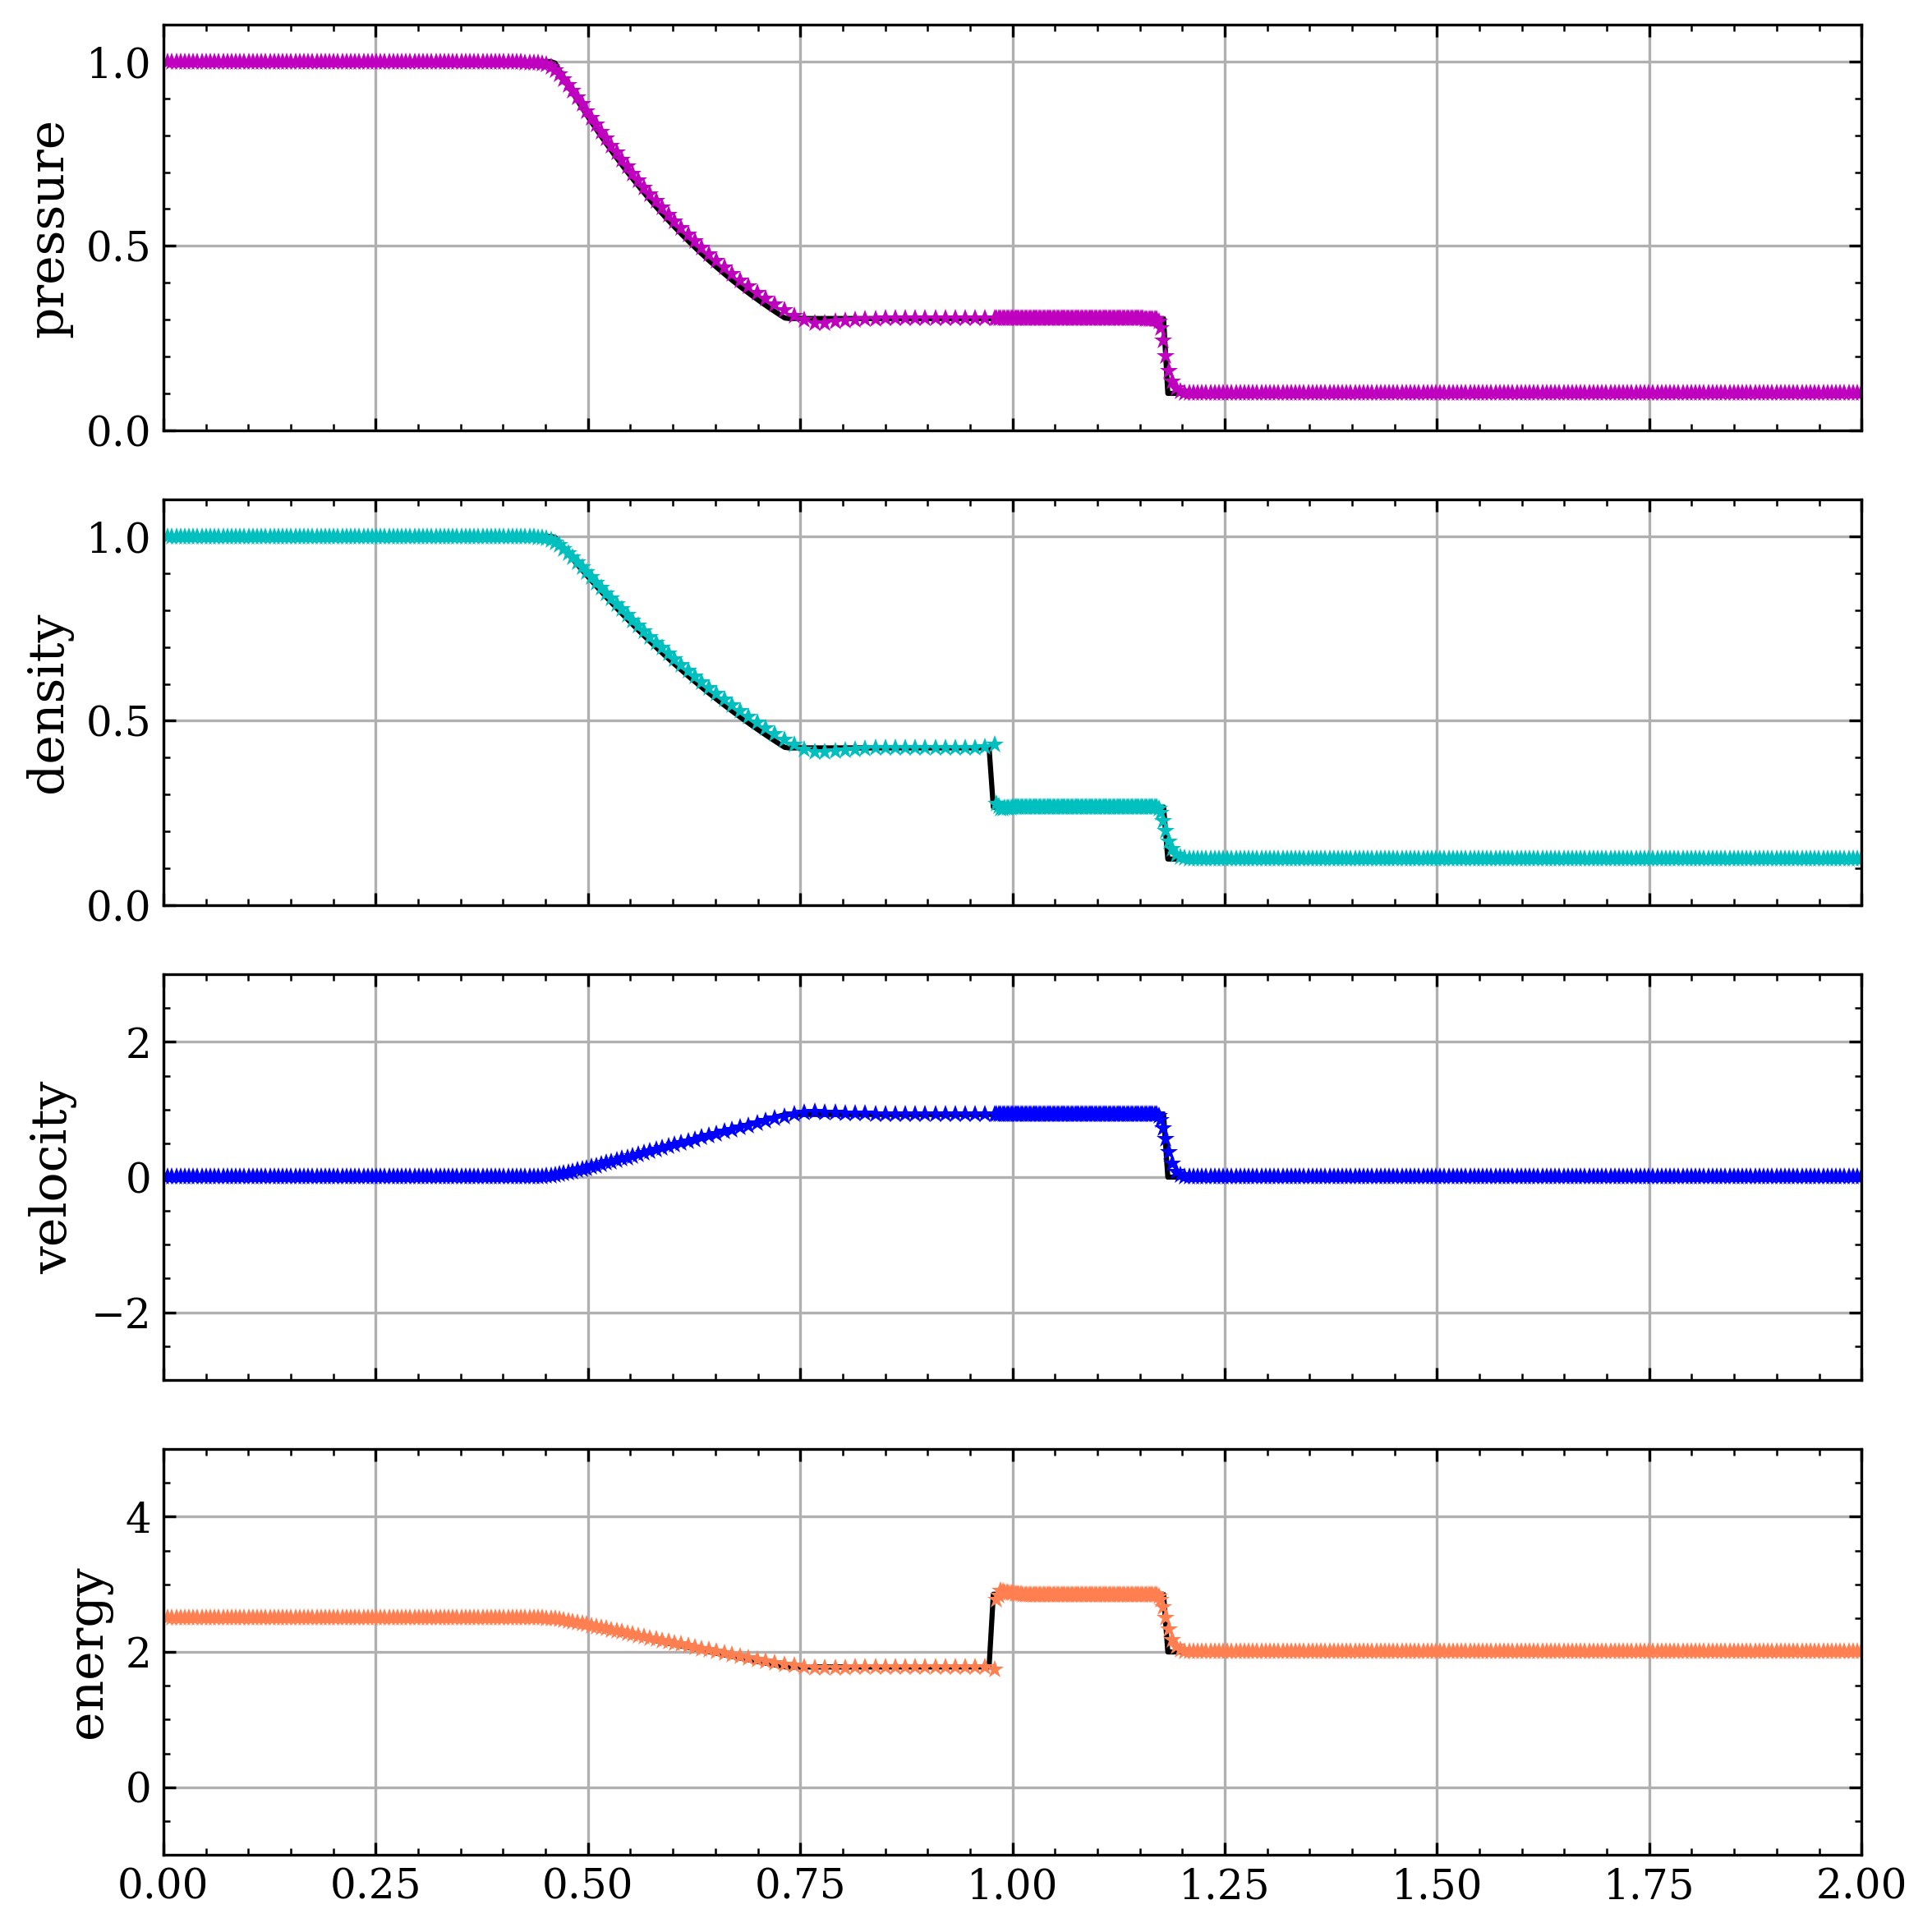

In [5]:
sod_shock_tube.numerical(N=400,verbose=False)

The code is much faster for smaller $N$, but the solution is more accurate for higher $N$, which is entirely unsurprising. All numerical solutions still struggle somewhat at the shock interface, but with a higher $N$, we can  model a steeper shock interface at the initial conditions step since the spacing between the two levels is smaller.

d) Decrease the CFL number to $0.25$ and increase it to $1.1$. What happens to the shock
solution in each case?

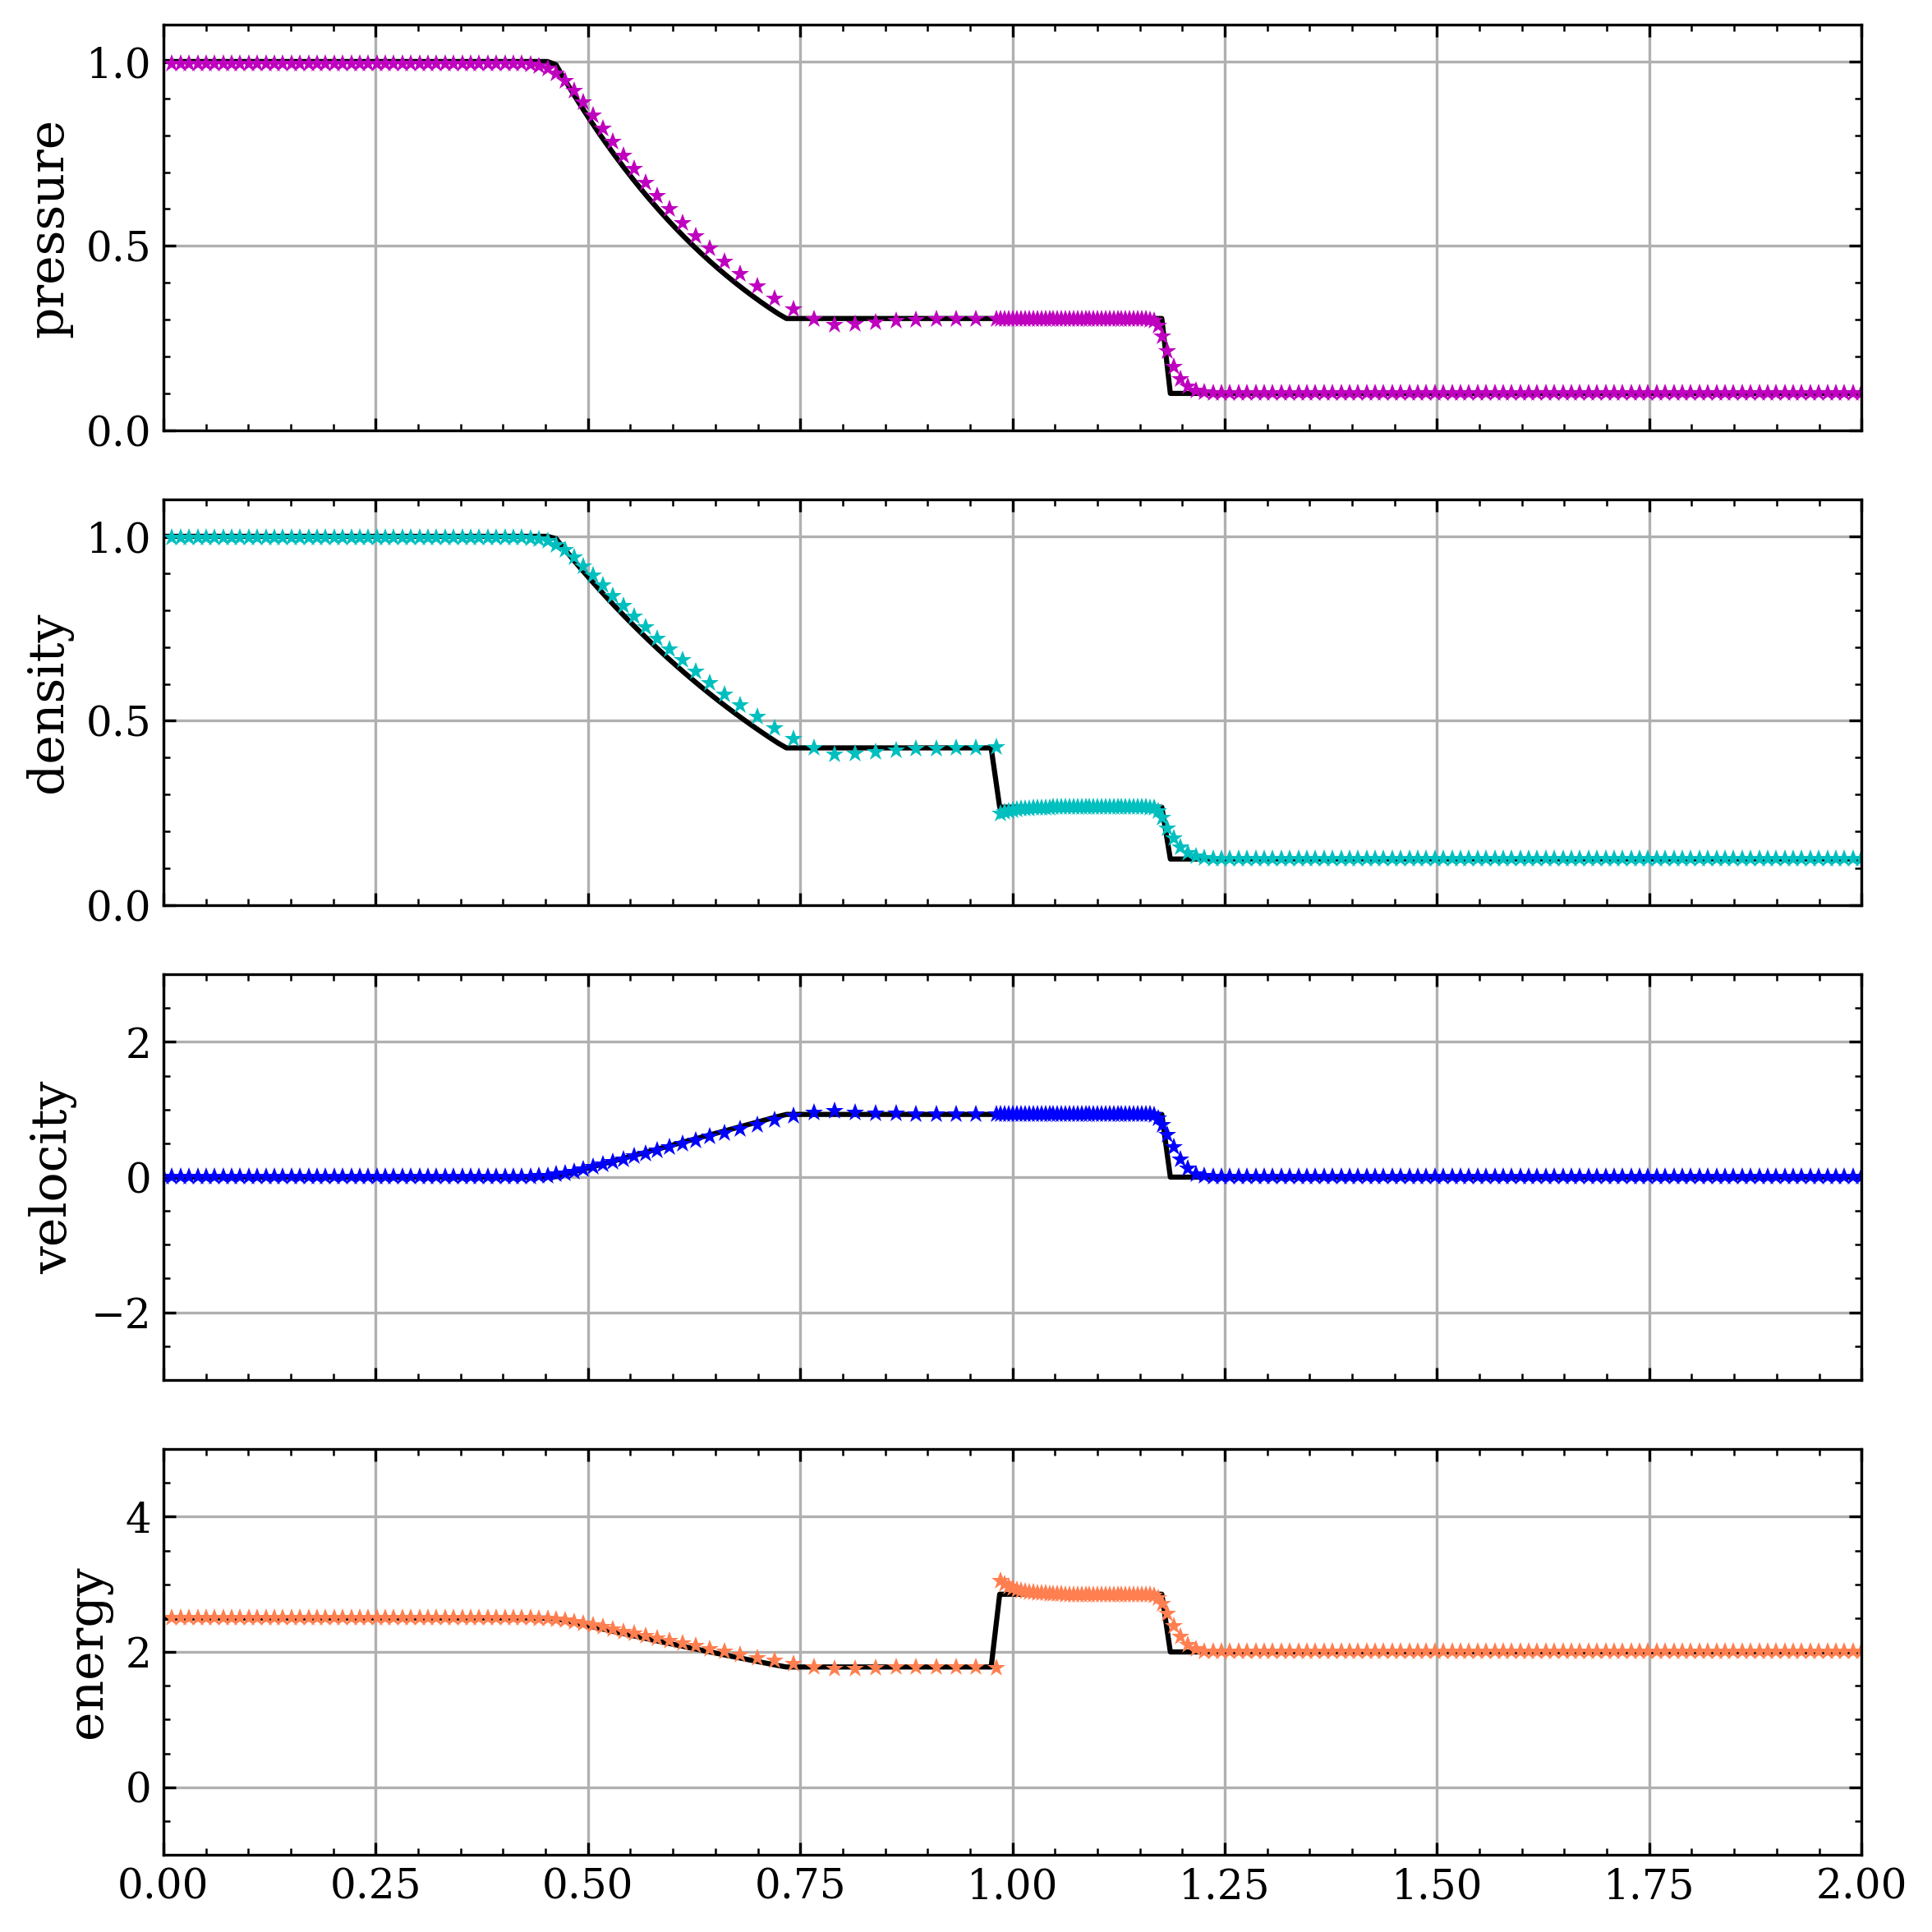

In [6]:
sod_shock_tube.numerical(CFL=0.25,verbose=False)

/Users/oc4858/comp-astro381/sod_shock_tube.py:313: RuntimeWarning: invalid value encountered in sqrt
  cs_new = np.sqrt(gamma*pr_old/rho_old)


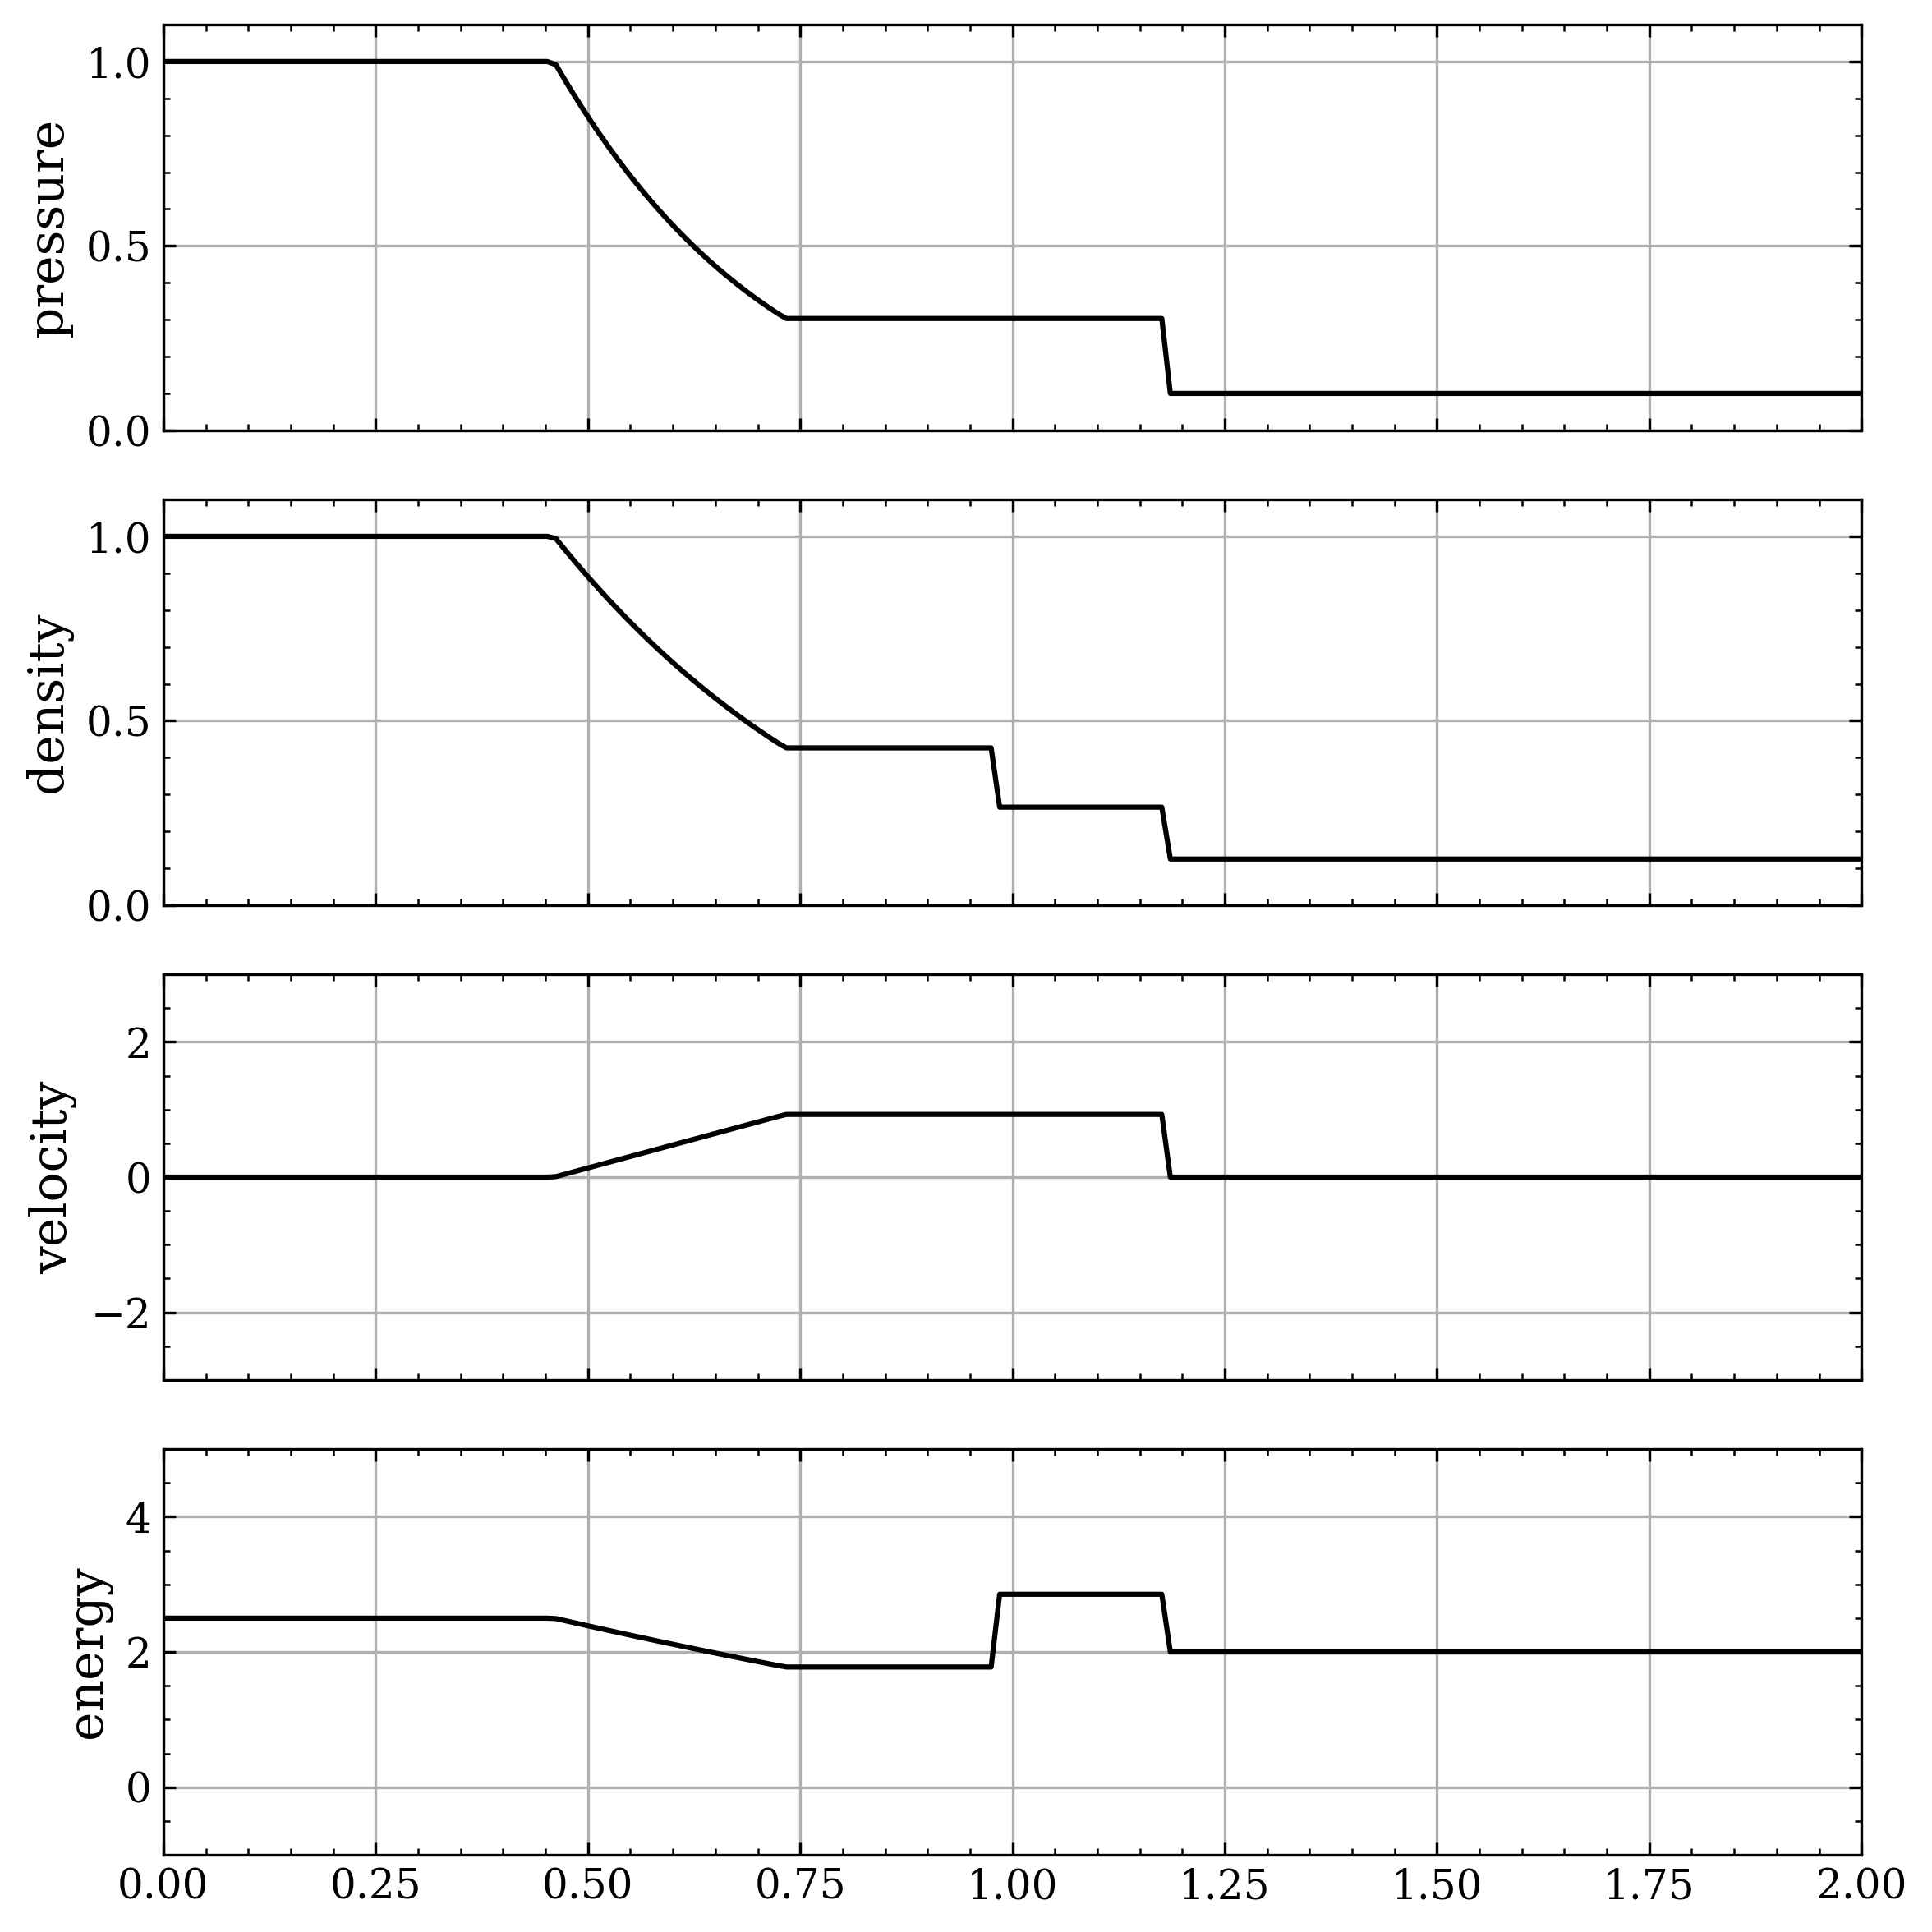

In [7]:
sod_shock_tube.numerical(CFL=1.1,verbose=False)

For a lower CFL number, the shock solution has an upturn slightly at the interface but it does slightly better at capturing the discontinuity for the same $N$ but a higher CFL number. For CFL $>1$, the solution is unstable and doesn't actually converge successfully. According to Stone & Norman (1992), the CFL number must be below 1 and should be below 0.7 in order to keep the time step small enough to see the particle in one cell.

e) Evaluate how sensitive the solution is to magnitude of the coefficient of artificial viscosity.
Increase the viscosity coefficients by a factor of 2 and decrease them by a factor of 2. How
does the solution change? What impact do the two different viscous components have on
the solution?

/Users/oc4858/comp-astro381/sod_shock_tube.py:313: RuntimeWarning: invalid value encountered in sqrt
  cs_new = np.sqrt(gamma*pr_old/rho_old)


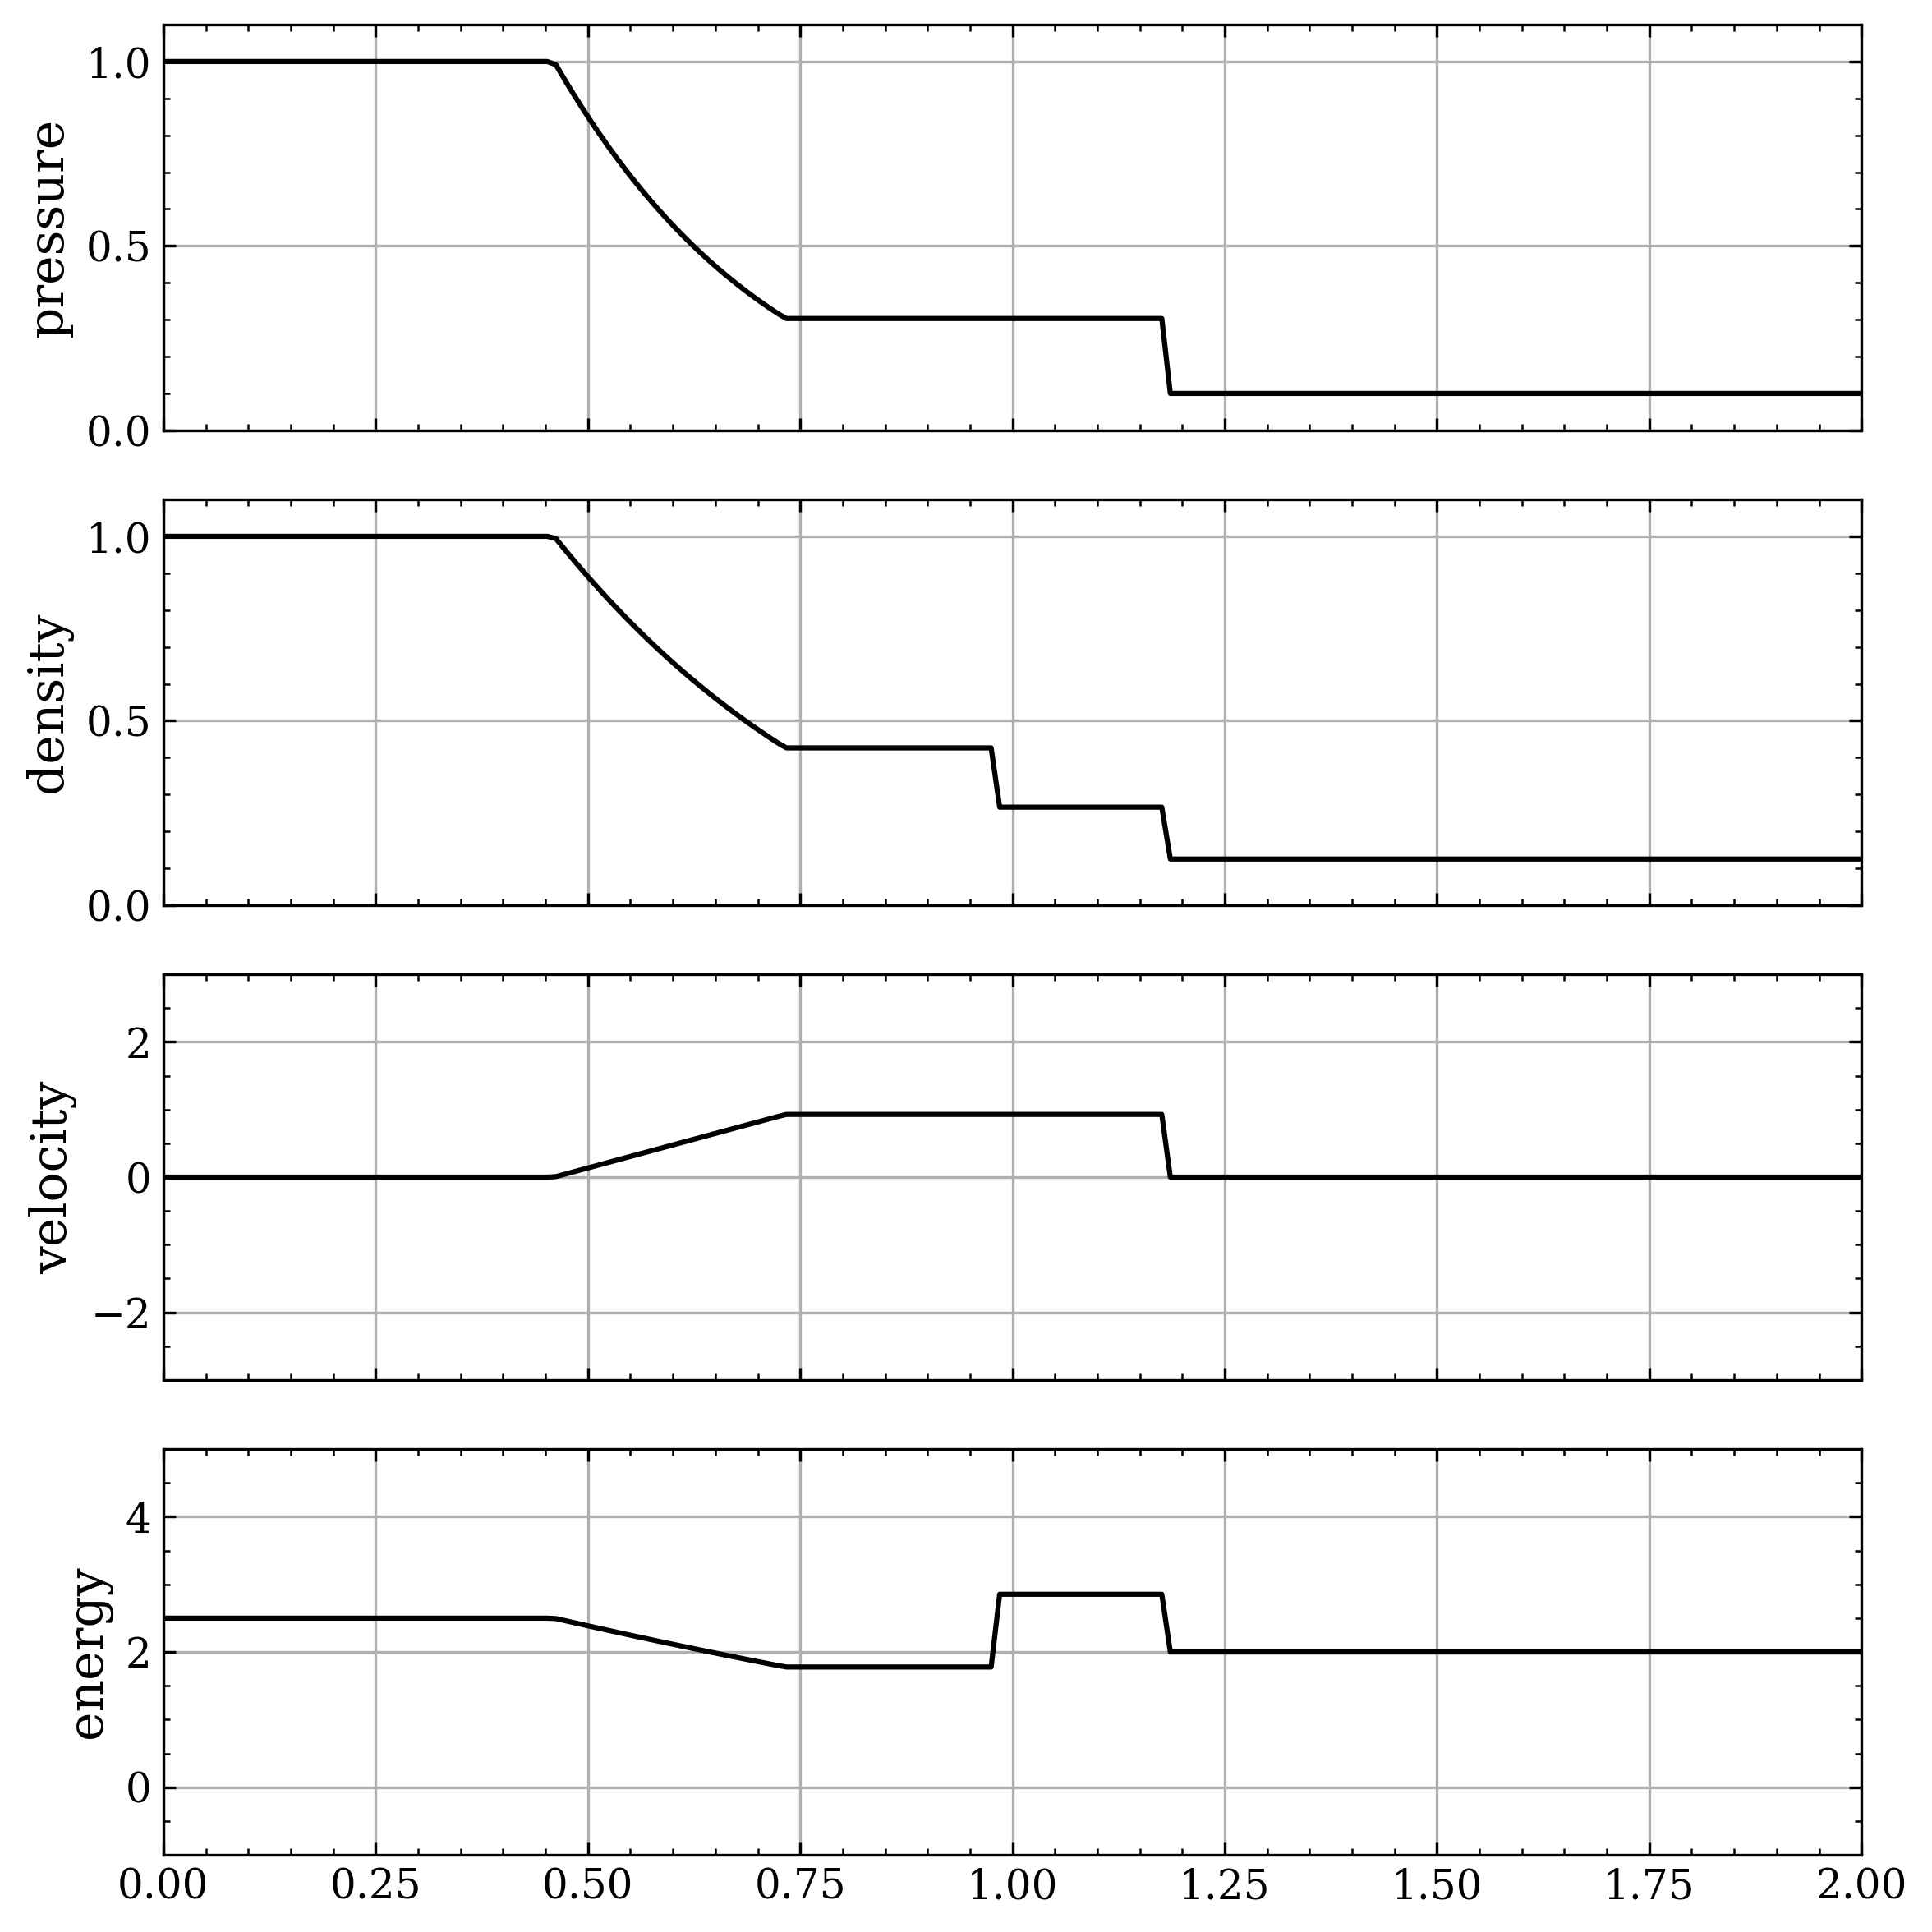

In [8]:
sod_shock_tube.numerical(q0=8,q1=1,verbose=False)

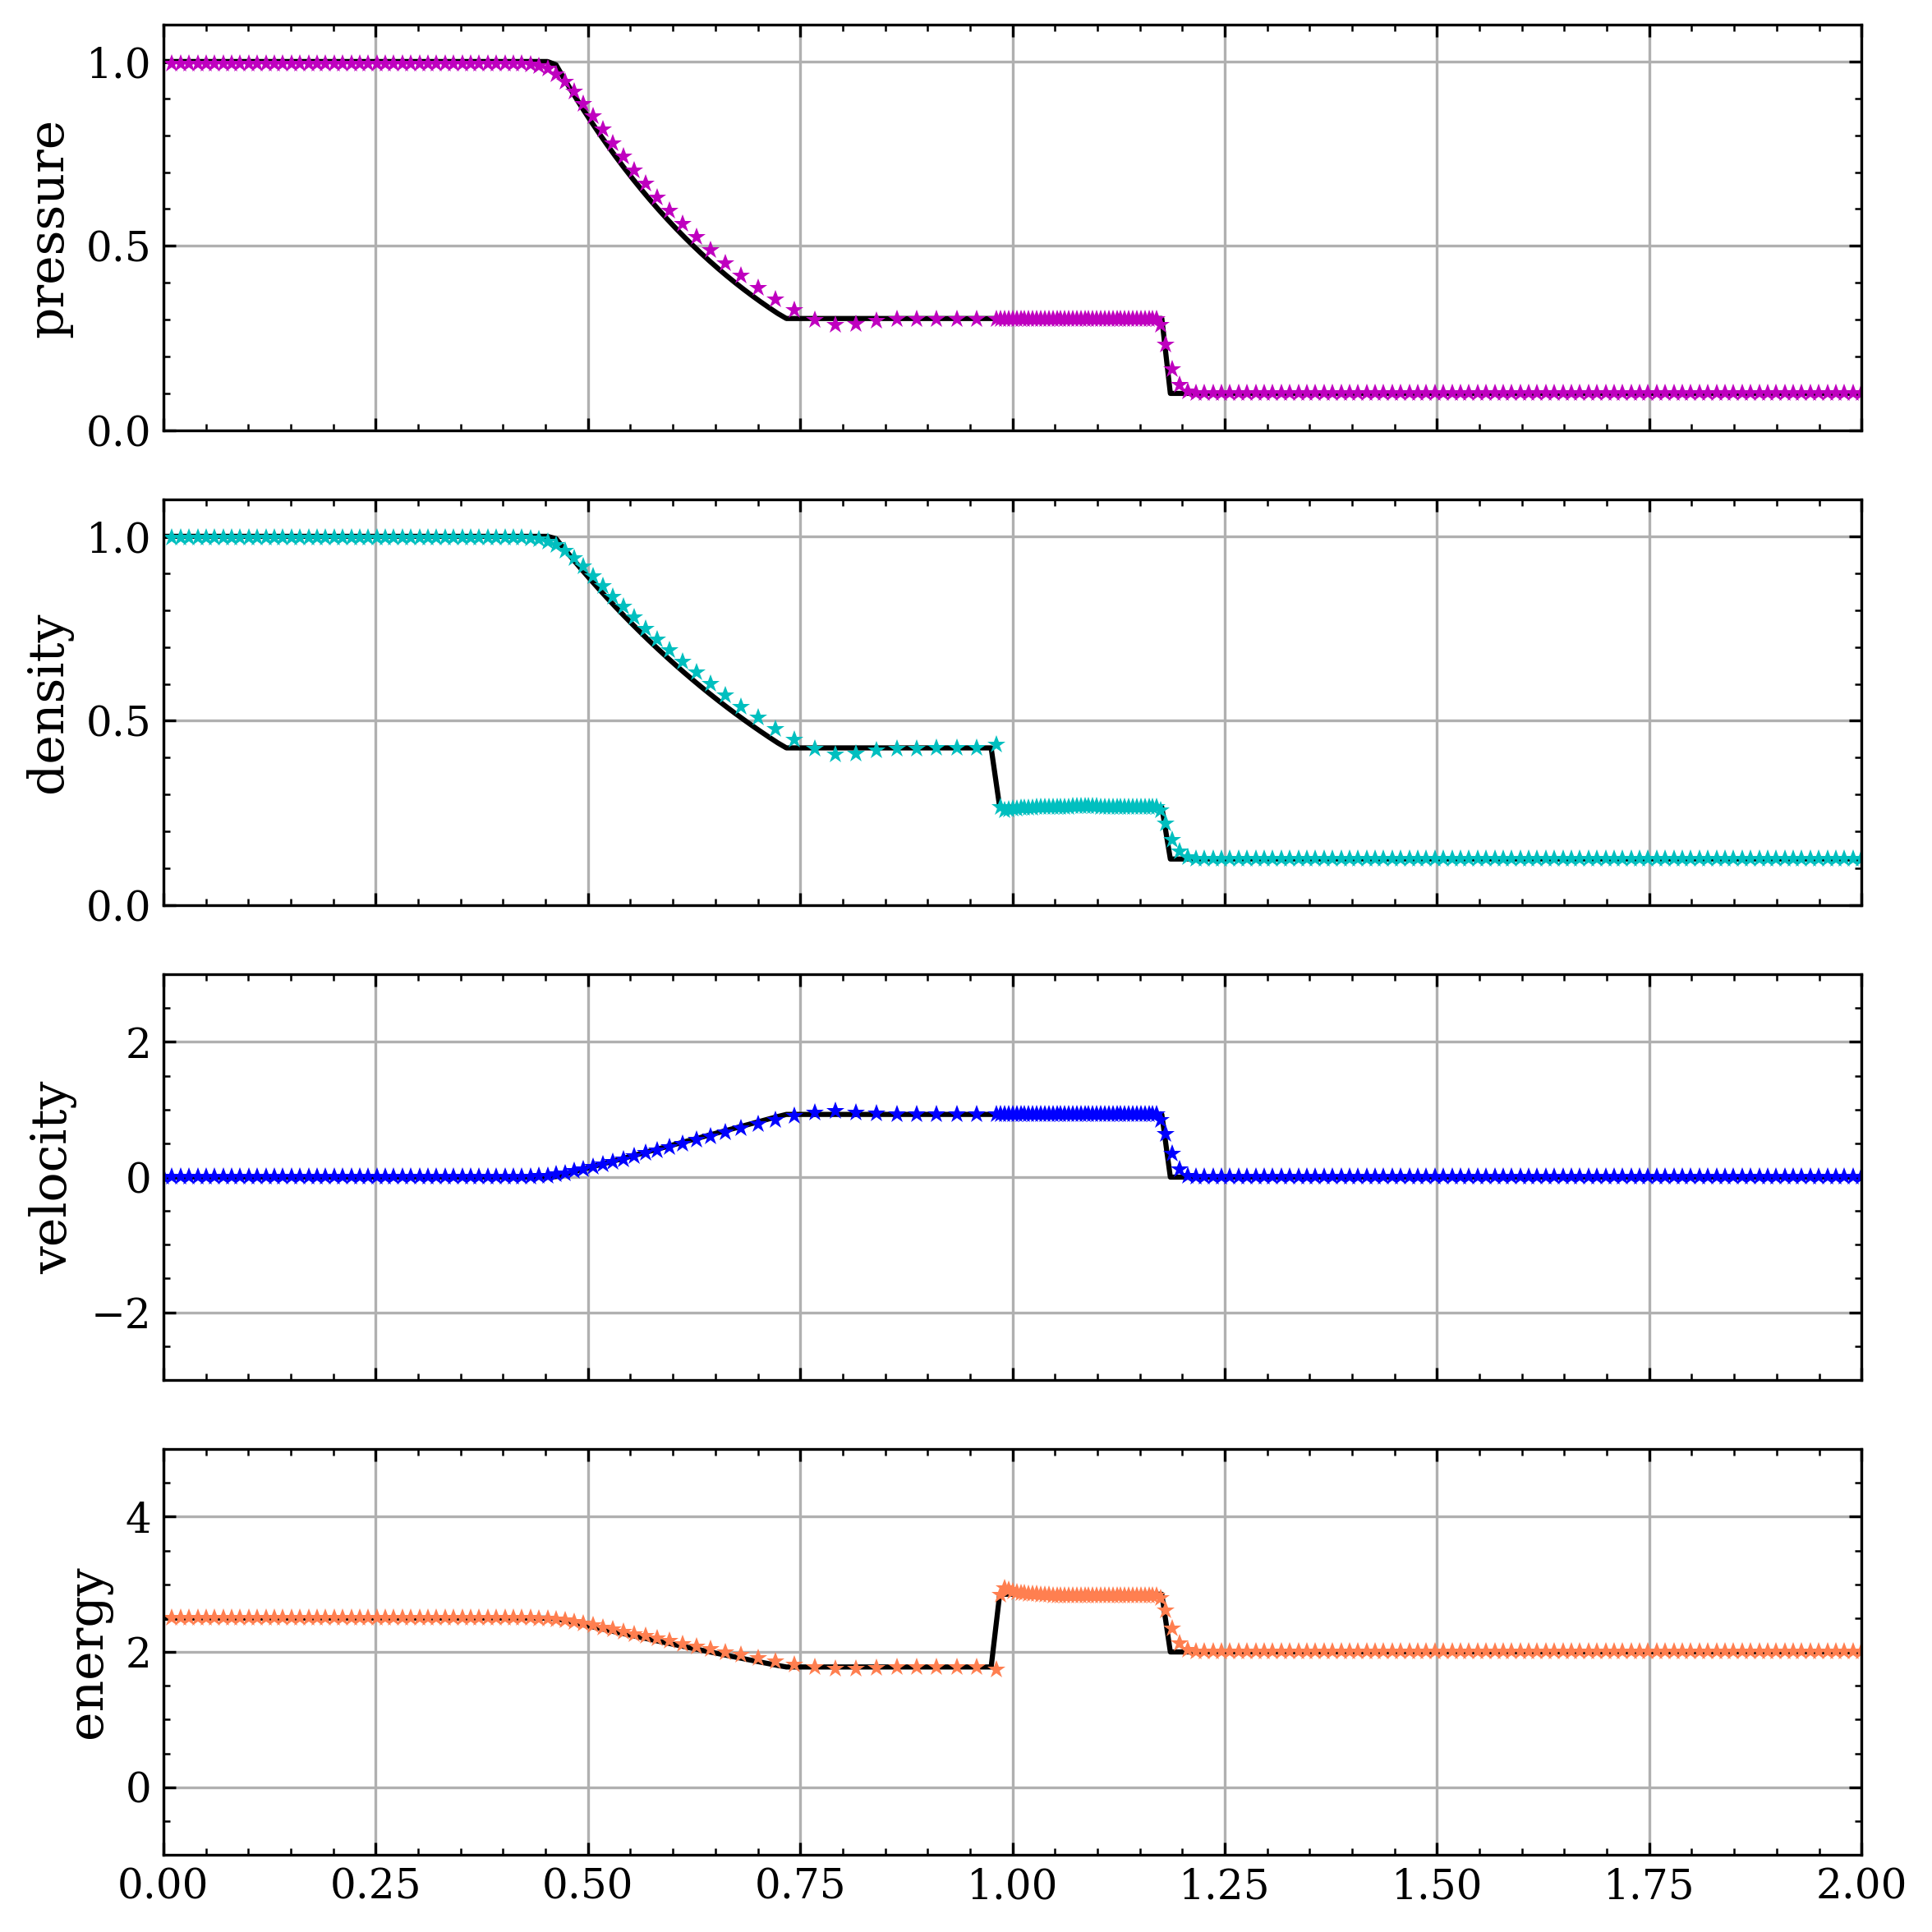

In [9]:
sod_shock_tube.numerical(q0=2,q1=0.25,verbose=False)

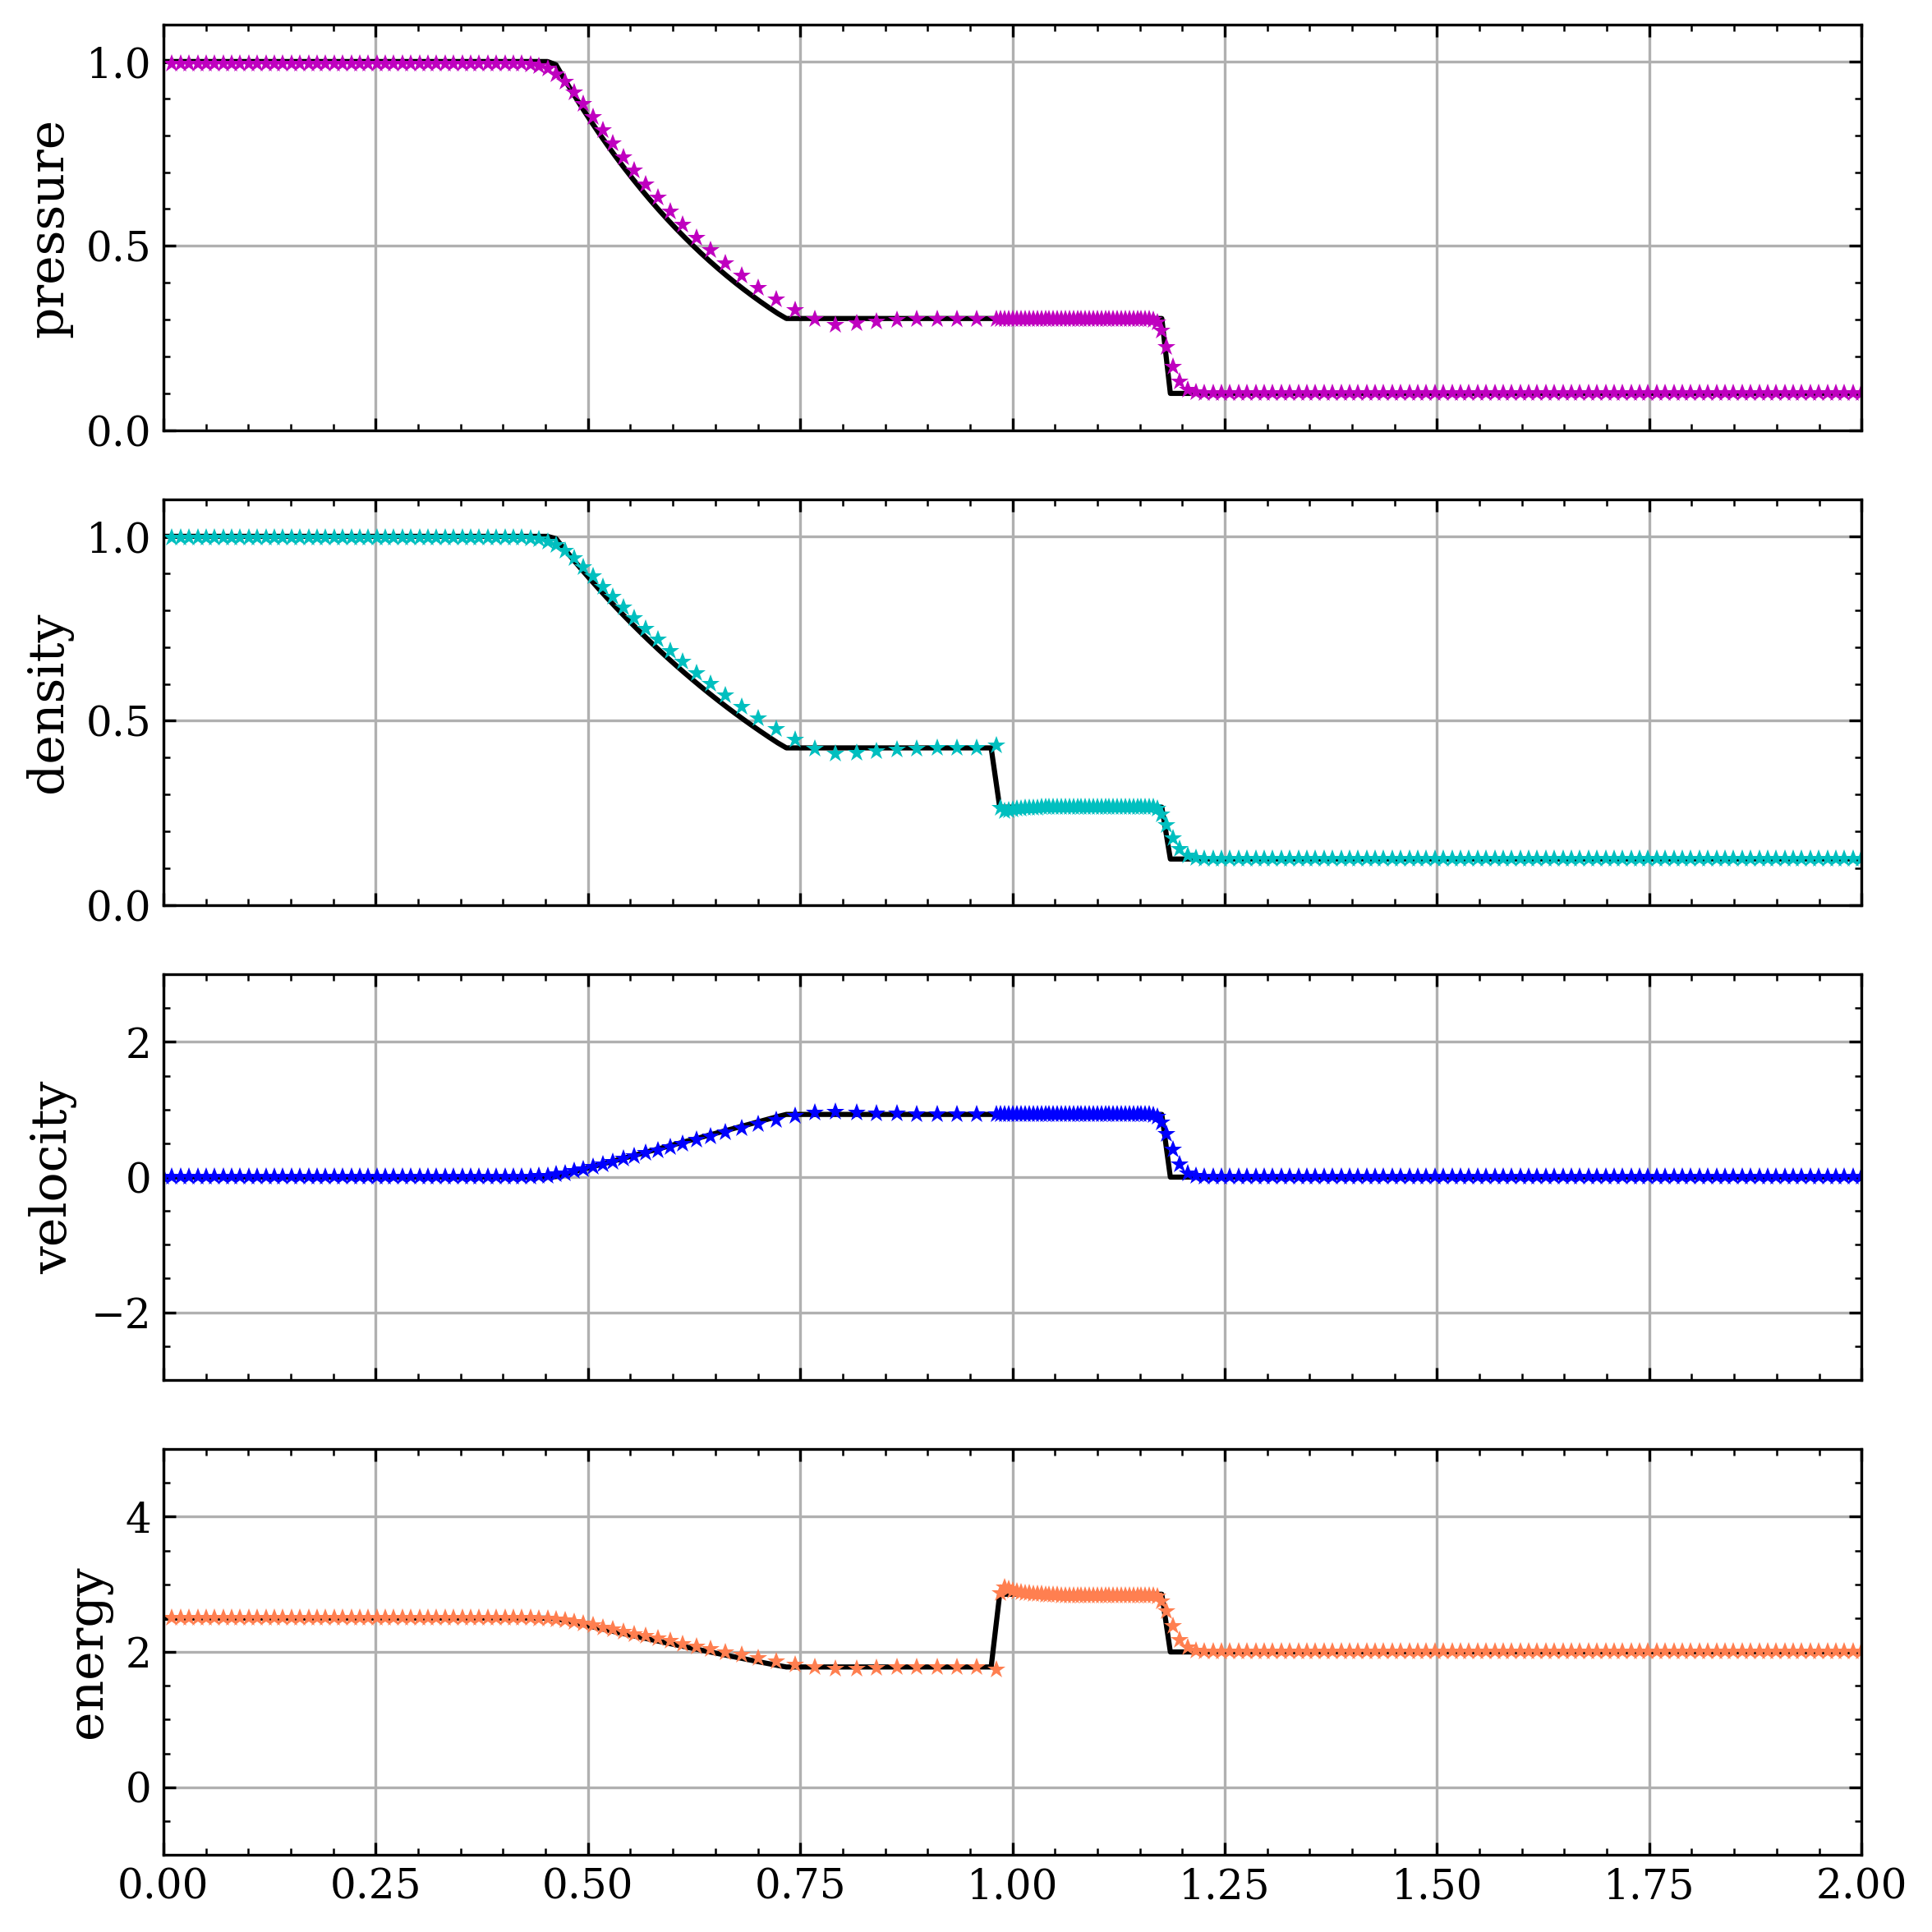

In [10]:
sod_shock_tube.numerical(q0=2,q1=0.5,verbose=False)

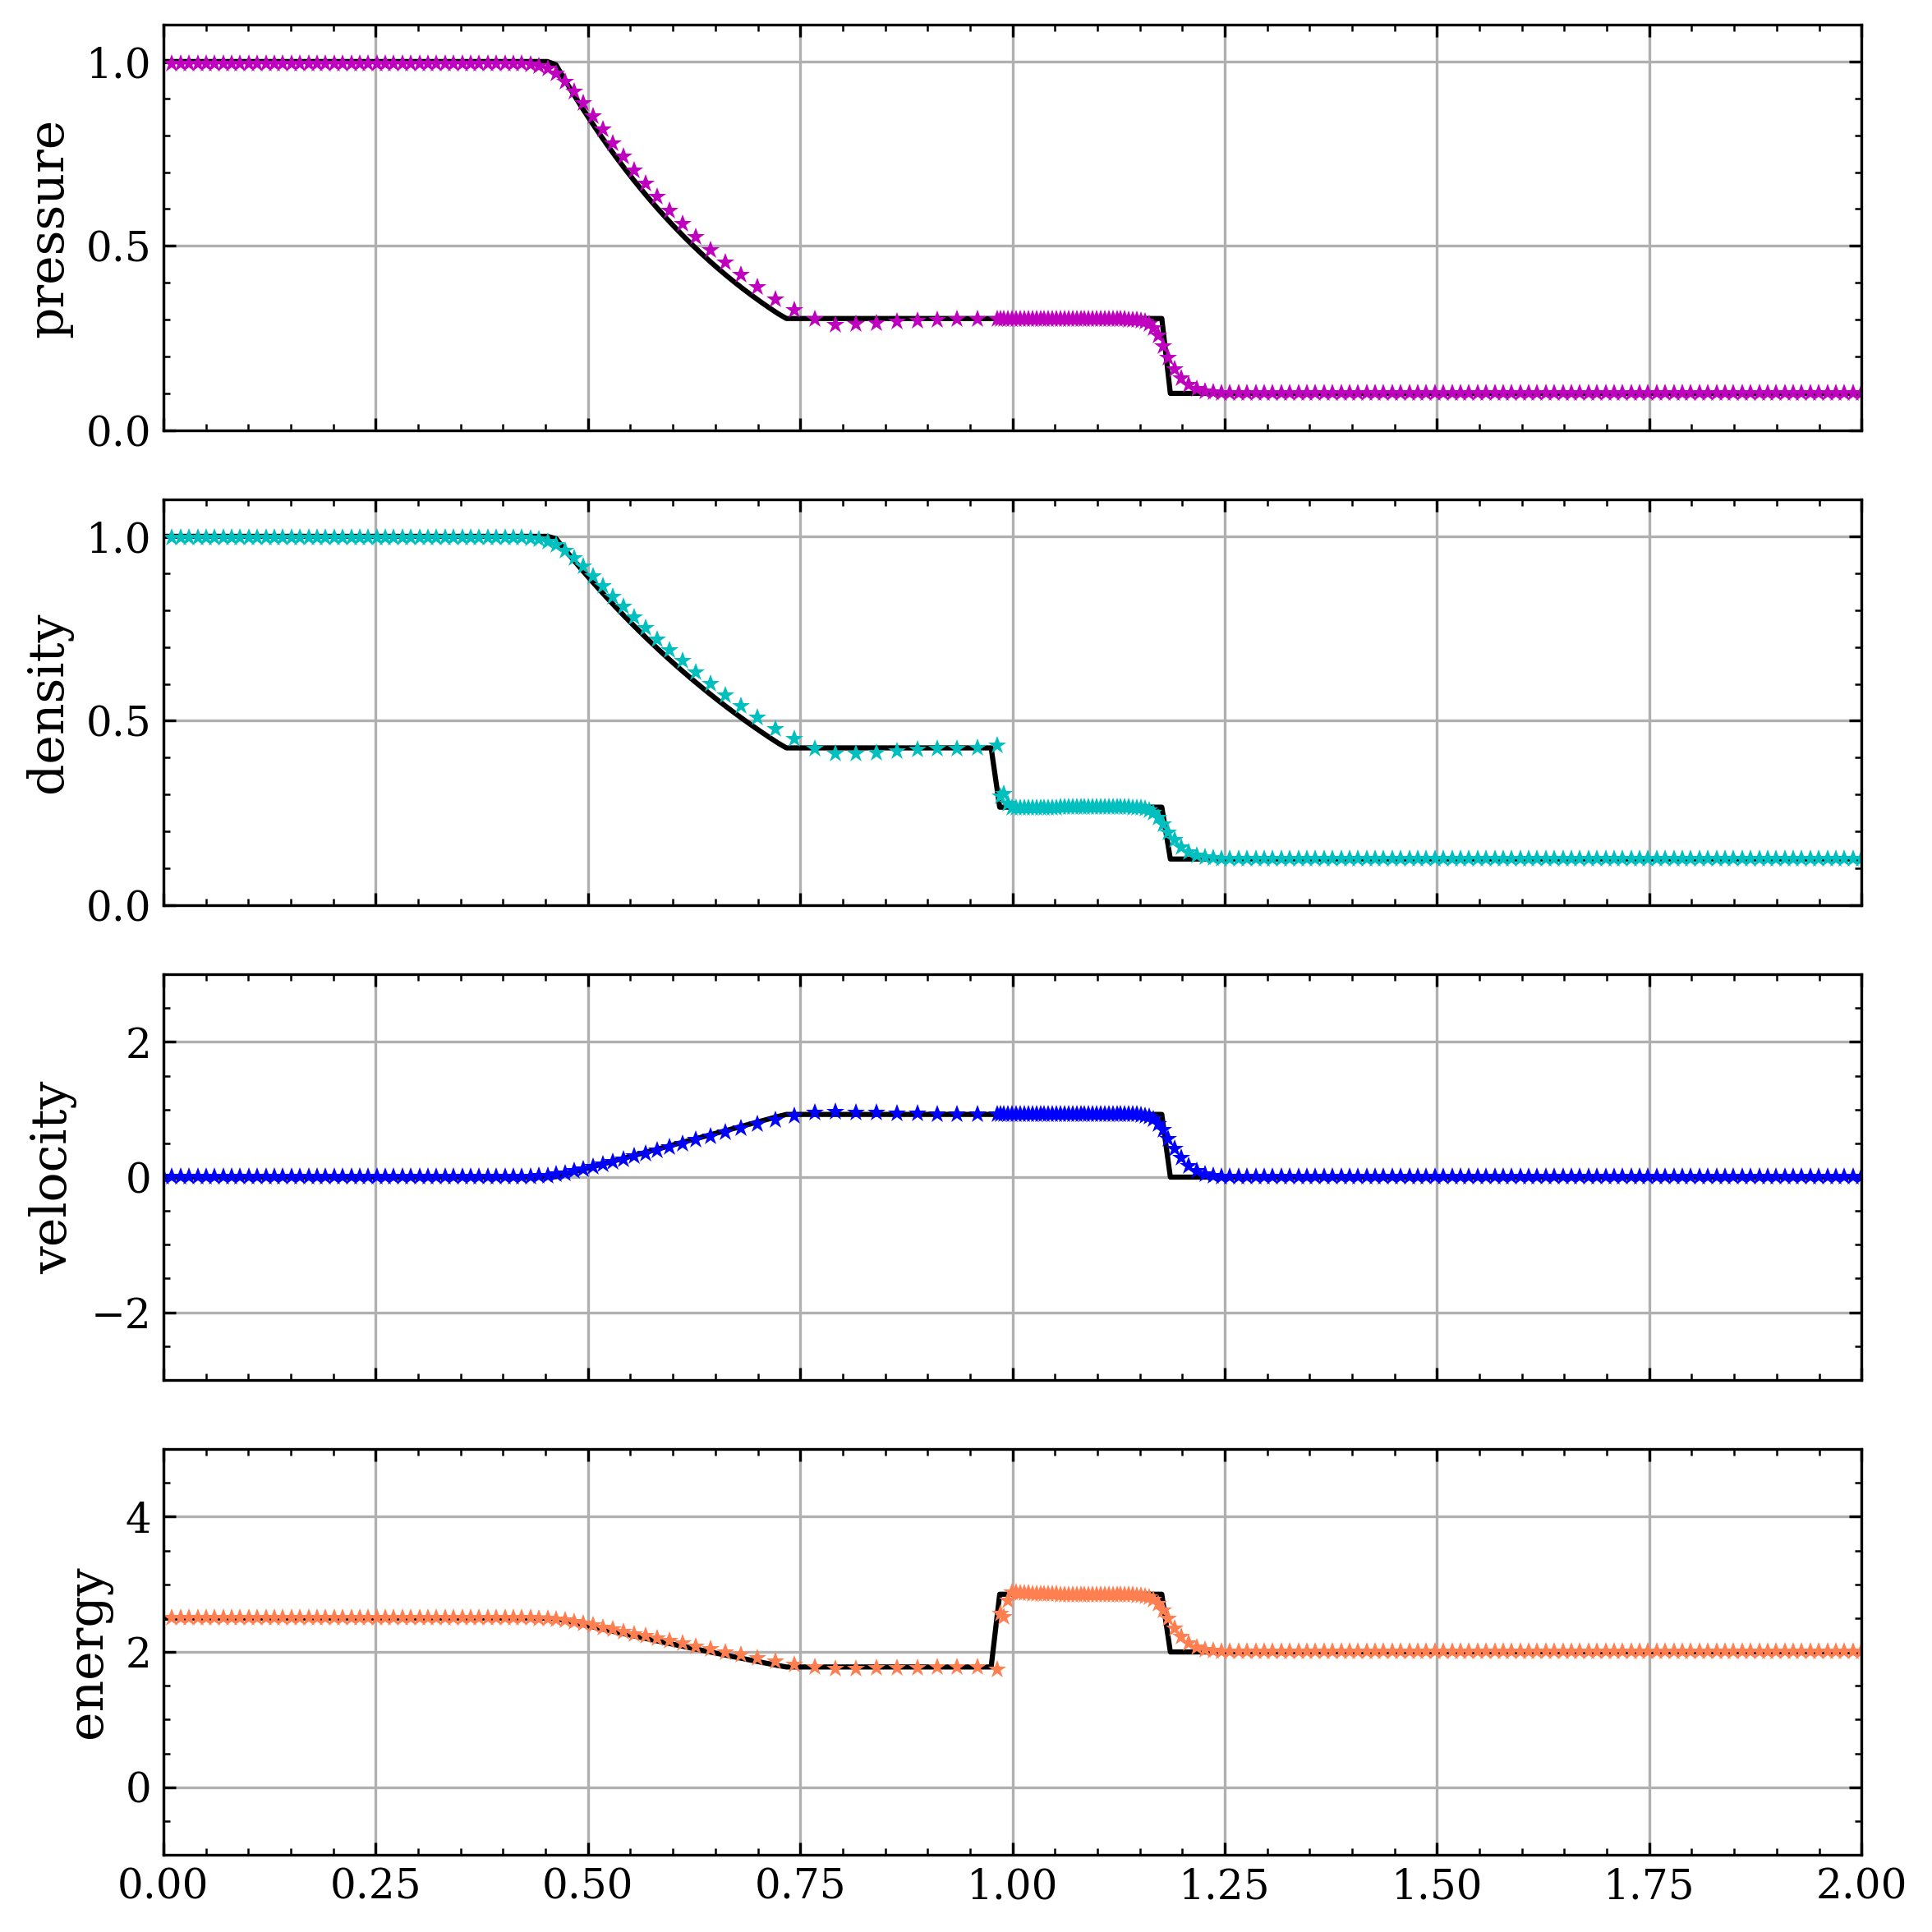

In [11]:
sod_shock_tube.numerical(q0=4,q1=1,verbose=False)

Smaller $q$ values returns a more accurate solution in general, and it actually doesn't seem to converge when I multiply both $q_0$ and $q_1$ by two. In terms of divergence, it seems pretty sensitive to $q_0$ becoming too high, and $q_1$ appears to smear out the shock.